# **_Angela Yu Course 100 Days of Code:_**

### _The Complete Python Pro Bootcamp_

---

---

## **_Day 99, Assignment 18:_**

#### _Data Science: "Analyse and Visualise the Space Race"_

**Modified version of lesson plan with updated scraped data from dataset and other changes specified in README.md**


---
---


## **_Introduction_**


<img src="https://i.imgur.com/9hLRsjZ.jpg" height=400>

<!-- ![Rocket](https://i.imgur.com/9hLRsjZ.jpg) -->

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1).

It includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!


<font size=2>

#### **_Install Package with Country Codes_**

```bash
pip install iso3166
```

#### **_Upgrade Plotly_**

Run the cell below if you are working with Google Colab.

```bash
pip install --upgrade plotly
```

</font>


---


#### **_Import Statements_**


In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

---


#### **_Notebook Presentation_**


In [3]:
pd.options.display.float_format = '{:,.2f}'.format

---
---


## **_ANB: I Scraped the Most Recent Data..._**

### **_...and updated the CSV._**


This first entry is a few years old and is on page 24:

https://nextspaceflight.com/launches/past/?page=24&search=

I'll scrape and update from the website's pages 1-24.


_In the CSV file see the necessary data:_

<font size=1>

```csv
,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,,Success
```

```csv
,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
```

</font>


I used Selenium for the scrape then Pandas to integrate w/Angela's CSV.

See the project `scrapeStuff` folder for all the details...


---
---


#### **_Load the Data_**


In [4]:
df_data = pd.read_csv('mission_launches.csv')

In [5]:
df_data.head(5)

Unnamed: 0 Organisation                                           Location  \
0           0       SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
1           1       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
2           2         CASC  Site 901 (SLS-1), Jiuquan Satellite Launch Cen...   
3           3   Rocket Lab     Rocket Lab LC-1B, Mahia Peninsula, New Zealand   
4           4       SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   

                           Date                                      Detail  \
0  Sun Apr 28, 2024 6:08 PM EDT      Falcon 9 Block 5 | Starlink Group 6-54   
1  Sat Apr 27, 2024 8:34 PM EDT  Falcon 9 Block 5 | Galileo FOC FM25 & FM27   
2  Thu Apr 25, 2024 8:59 AM EDT               Long March 2F/G | Shenzhou 18   
3  Tue Apr 23, 2024 6:32 PM EDT     Electron/Curie | Beginning Of The Swarm   
4  Tue Apr 23, 2024 6:17 PM EDT      Falcon 9 Block 5 | Starlink Group 6-53   

  Rocket_Status Price Mission_Status  
0  StatusActive  67.0        Success  
1  StatusActive  67.0        Success  
2  StatusActive   NaN        Success  
3  StatusActive   7.5        Success  
4  StatusActive  67.0        Success

For clarity, rename 'Price' to 'Price_US_Mil`


In [6]:
df_data.rename(columns={"Price": "Price_US_Mil"}, inplace=True)

In [7]:
df_data

Unnamed: 0 Organisation  \
0              0       SpaceX   
1              1       SpaceX   
2              2         CASC   
3              3   Rocket Lab   
4              4       SpaceX   
...          ...          ...   
5022        5022      US Navy   
5023        5023         AMBA   
5024        5024      US Navy   
5025        5025    RVSN USSR   
5026        5026    RVSN USSR   

                                               Location  \
0              SLC-40, Cape Canaveral SFS, Florida, USA   
1            LC-39A, Kennedy Space Center, Florida, USA   
2     Site 901 (SLS-1), Jiuquan Satellite Launch Cen...   
3        Rocket Lab LC-1B, Mahia Peninsula, New Zealand   
4              SLC-40, Cape Canaveral SFS, Florida, USA   
...                                                 ...   
5022           LC-18A, Cape Canaveral AFS, Florida, USA   
5023           LC-26A, Cape Canaveral AFS, Florida, USA   
5024           LC-18A, Cape Canaveral AFS, Florida, USA   
5025          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
5026          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                              Date  \
0     Sun Apr 28, 2024 6:08 PM EDT   
1     Sat Apr 27, 2024 8:34 PM EDT   
2     Thu Apr 25, 2024 8:59 AM EDT   
3     Tue Apr 23, 2024 6:32 PM EDT   
4     Tue Apr 23, 2024 6:17 PM EDT   
...                            ...   
5022    Wed Feb 05, 1958 07:33 UTC   
5023    Sat Feb 01, 1958 03:48 UTC   
5024    Fri Dec 06, 1957 16:44 UTC   
5025    Sun Nov 03, 1957 02:30 UTC   
5026    Fri Oct 04, 1957 19:28 UTC   

                                          Detail  Rocket_Status Price_US_Mil  \
0         Falcon 9 Block 5 | Starlink Group 6-54   StatusActive         67.0   
1     Falcon 9 Block 5 | Galileo FOC FM25 & FM27   StatusActive         67.0   
2                  Long March 2F/G | Shenzhou 18   StatusActive          NaN   
3        Electron/Curie | Beginning Of The Swarm   StatusActive          7.5   
4         Falcon 9 Block 5 | Starlink Group 6-53   StatusActive         67.0   
...                                          ...            ...          ...   
5022                   Vanguard | Vanguard TV3BU  StatusRetired          NaN   
5023                         Juno I | Explorer 1  StatusRetired          NaN   
5024                     Vanguard | Vanguard TV3  StatusRetired          NaN   
5025                  Sputnik 8K71PS | Sputnik-2  StatusRetired          NaN   
5026                  Sputnik 8K71PS | Sputnik-1  StatusRetired          NaN   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
5022        Failure  
5023        Success  
5024        Failure  
5025        Success  
5026        Success  

[5027 rows x 8 columns]

---
---


## **_Preliminary Data Exploration_**

-   What is the shape of `df_data`?
-   How many rows and columns does it have?
-   What are the column names?
-   Are there any NaN values or duplicates?


In [8]:
df_shape = df_data.shape
rows, columns = df_shape

print(f"`df_data` has a shape of {df_shape}.")
print(f"Therefore it has {rows} rows and {columns} colunns.")

`df_data` has a shape of (5027, 8).
Therefore it has 5027 rows and 8 colunns.


In [9]:
col_names = ", ".join(df_data.columns)

print(f"The column names are {col_names}.")

The column names are Unnamed: 0, Organisation, Location, Date, Detail, Rocket_Status, Price_US_Mil, Mission_Status.


---


### **_Data Cleaning - Check for Missing Values and Duplicates_**

Consider removing columns containing junk data.

ANB: See below (just after `Descriptive Statistics` section) for continued data cleaning....


ANB: There is an extra column duplicating the index called "Unnamed: 0". I'll remove that:


In [10]:
df_data = df_data.drop("Unnamed: 0", axis=1)

In [11]:
df_shape = df_data.shape
rows, columns = df_shape

print(f"`df_data` has a shape of {df_shape}.")
print(f"Therefore it has {rows} rows and {columns} colunns.")

`df_data` has a shape of (5027, 7).
Therefore it has 5027 rows and 7 colunns.


---


### **_ANB: Convert and make uniform Date values:_**

ANB - I'm taking this opportunity to convert the _Date_ column to pd.to_datetime() so we can parse the min/max, etc...


First I'll need to get all the EDTs to be UTCs.

Then, convert to DT objects.

Here's the function:


In [12]:
import pytz

# Convert EDT times to UTC:


def convert_edt_to_utc(date_str):
    if 'EDT' in date_str or 'EST' in date_str:
        date_str = date_str.replace('EDT', '').replace('EST', '').strip()
        dt = pd.to_datetime(date_str)
        edt_tz = pytz.timezone('US/Eastern')
        dt_utc = edt_tz.localize(dt).astimezone(pytz.utc)
        return dt_utc
    else:
        return pd.to_datetime(date_str)


df_data['Date'] = df_data['Date'].apply(convert_edt_to_utc)

In [13]:
# # Inspect `df_data.Date`:
# for i in df_data.Date:
#     print(i)

Some vals look different:

1958-09-23 07:40:00+00:00
1958-08-29 00:00:00

Let's address this:


In [14]:
def convert_to_utc(dt_obj):
    if dt_obj.tzinfo:
        return dt_obj.astimezone(pytz.utc)
    else:
        return pytz.utc.localize(dt_obj)

In [15]:
df_data.Date = df_data.Date.apply(convert_to_utc)

In [16]:
# # Reinspect:
# for i in df_data.Date:
#     print(i)

---


### **_ANB: Convert Price values to nums:_**


In [17]:
# # Inspect the column:
# for i in df_data.Price_US_Mil:
#     print(i)

This is returning items like `1,160`.

Since this column indicates millions, that would mean 1.16 billion.

So let's just remove the commas before type conversion:


In [18]:
def remove_commas_and_make_float(price_entry):
    if type(price_entry) is str:
        if ',' in price_entry:
            price_entry = price_entry.replace(',', '')
        return float(price_entry)
    else:
        return price_entry

In [19]:
df_data.Price_US_Mil = df_data.Price_US_Mil.apply(remove_commas_and_make_float)

---

### **_Descriptive Statistics_**


Now the descriptive statistics:


In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5027 entries, 0 to 5026
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    5027 non-null   object             
 1   Location        5027 non-null   object             
 2   Date            5027 non-null   datetime64[ns, UTC]
 3   Detail          5027 non-null   object             
 4   Rocket_Status   5027 non-null   object             
 5   Price_US_Mil    1556 non-null   float64            
 6   Mission_Status  5027 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 275.0+ KB


In [21]:
df_data.describe()

Price_US_Mil
count      1,556.00
mean         115.67
std          234.63
min            2.50
25%           30.80
50%           64.68
75%           97.00
max        5,000.00

In [22]:
df_data.Date.max()

Timestamp('2024-04-28 22:08:00+0000', tz='UTC')

In [23]:
df_data.Date.min()

Timestamp('1957-10-04 19:28:00+0000', tz='UTC')

In [24]:
df_data.Price_US_Mil.describe()

count   1,556.00
mean      115.67
std       234.63
min         2.50
25%        30.80
50%        64.68
75%        97.00
max     5,000.00
Name: Price_US_Mil, dtype: float64

In [25]:
df_data.Date.describe()

count                                   5027
mean     1992-10-09 15:35:29.468868096+00:00
min                1957-10-04 19:28:00+00:00
25%                1974-02-01 20:00:00+00:00
50%                1990-07-25 19:21:00+00:00
75%                2014-07-01 07:09:00+00:00
max                2024-04-28 22:08:00+00:00
Name: Date, dtype: object

In [26]:
# # Inspect the column:
# for i in df_data.Price_US_Mil:
#     print(i)

---


### **_ANB: More Data Cleaning - Check for Missing Values and Duplicates_**


#### Check null vals:


In [27]:
df_data.isnull().describe()

Organisation Location   Date Detail Rocket_Status Price_US_Mil  \
count          5027     5027   5027   5027          5027         5027   
unique            1        1      1      1             1            2   
top           False    False  False  False         False         True   
freq           5027     5027   5027   5027          5027         3471   

       Mission_Status  
count            5027  
unique              1  
top             False  
freq             5027

In [28]:
df_data.isna().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price_US_Mil      3471
Mission_Status       0
dtype: int64

Price has 5012 nan vals.


In [29]:
df_data.notna().sum()

Organisation      5027
Location          5027
Date              5027
Detail            5027
Rocket_Status     5027
Price_US_Mil      1556
Mission_Status    5027
dtype: int64

Every other column has no null vals. I think we're good to go on that score.


#### Check duplicates:


In [30]:
df_data.duplicated().sum()

1

Remove all duplicates in-place:


In [31]:
df_data.drop_duplicates(inplace=True)

In [32]:
df_data.duplicated().sum()

0

Duplicates removed.


---
---


## **_Number of Launches per Company_**

Create a chart that shows the number of space mission launches by organisation.


Create series with value counts from `df_data["Organisation]`:


In [33]:
series_organisation = df_data.Organisation.value_counts()

In [34]:
series_organisation

Organisation
RVSN USSR           1777
CASC                 427
SpaceX               343
Arianespace          299
General Dynamics     251
                    ... 
OrienSpace             1
Space Pioneer          1
Khrunichev             1
Sandia                 1
EER                    1
Name: count, Length: 69, dtype: int64

<font size=1>

```python
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta
```

</font>


I tried pie charts but they're too congested...


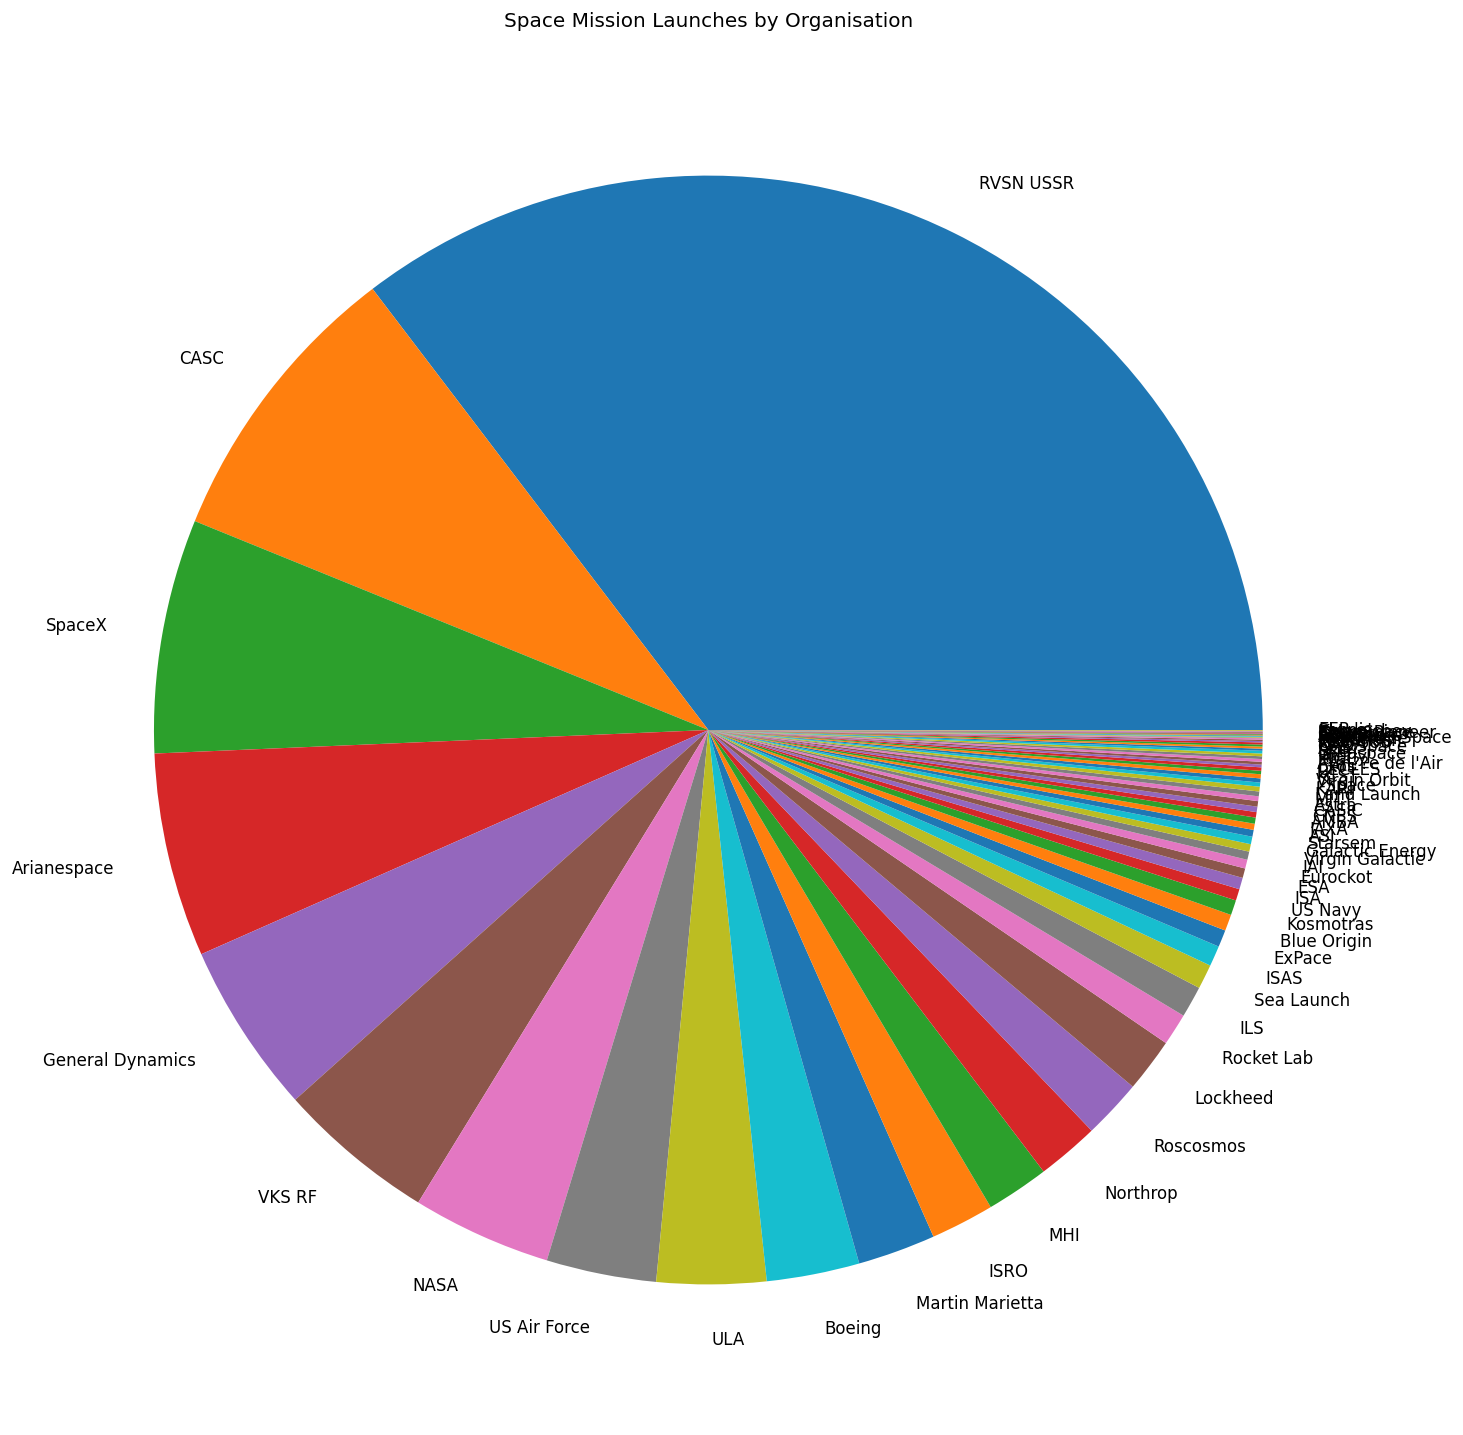

In [35]:
plt.figure(figsize=(15, 15), dpi=120)
plt.title("Space Mission Launches by Organisation")

plt.pie(series_organisation, labels=series_organisation.index)

plt.show()

In [36]:
fig = px.pie(
    names=series_organisation.index,
    values=series_organisation,
    labels=series_organisation.index,
    height=1000,
    width=1000,
)

fig.update_layout(
    title=dict(text="Missions by Organisation", font=dict(
        size=24), automargin=True, yref='paper'),
)


# fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

So trying bar chart instead...


In [37]:
import matplotlib.colors as mcolors
from random import choices

css_colors = list(mcolors.CSS4_COLORS.keys())

bar_colors = choices(css_colors, k=len(series_organisation))

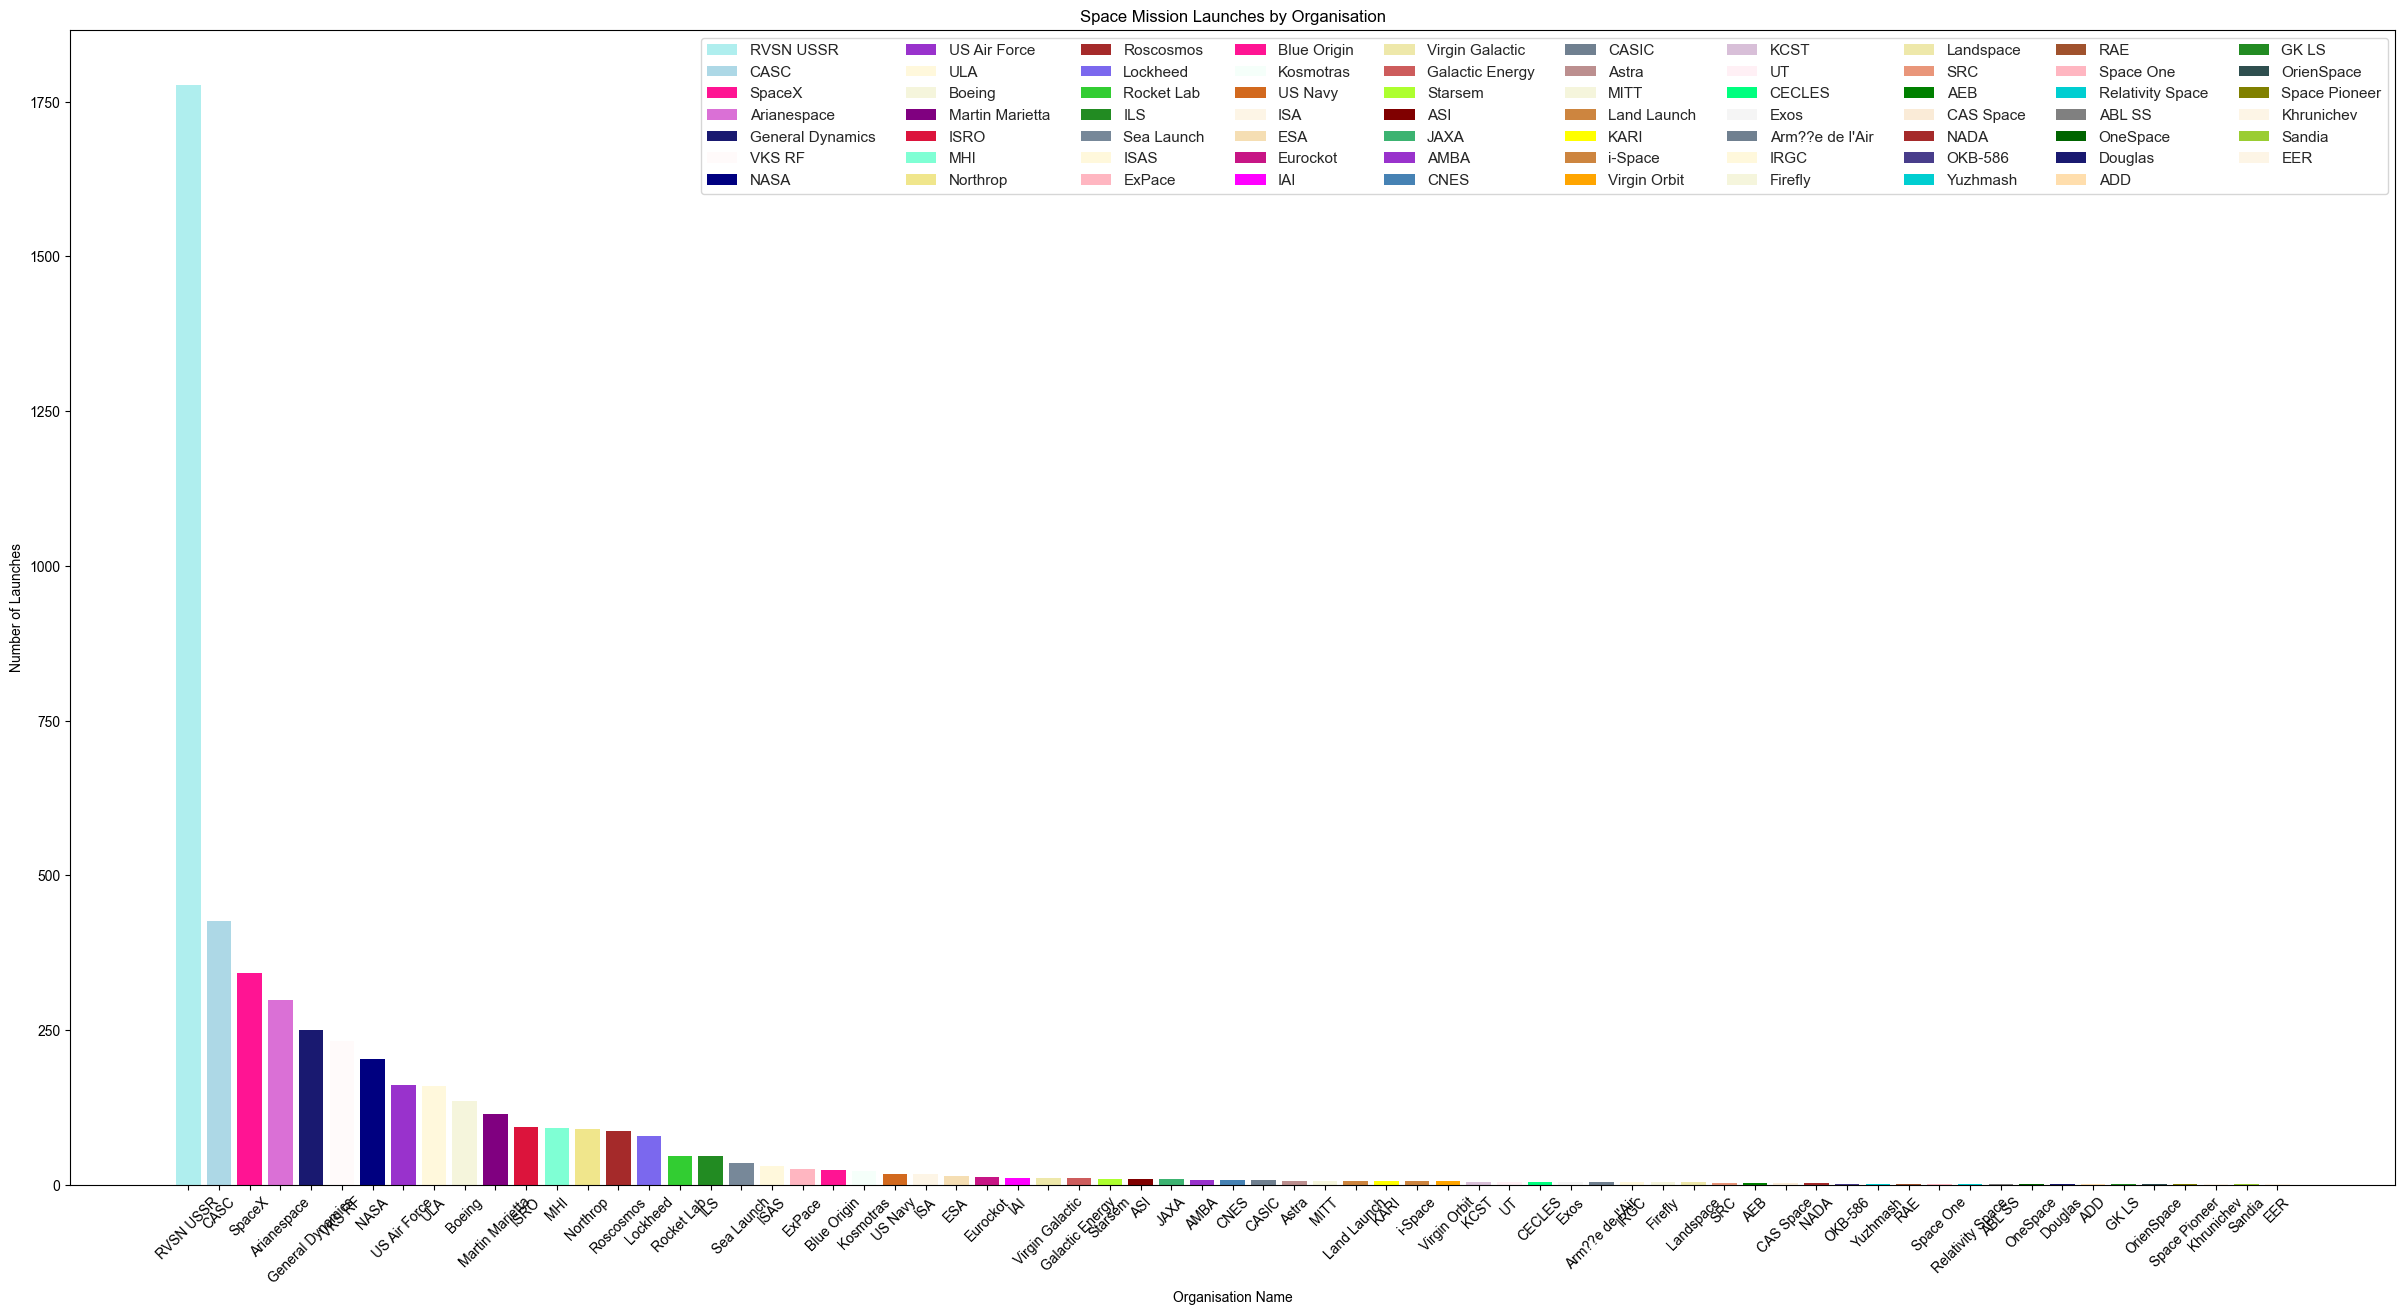

In [38]:
fig, ax = plt.subplots(figsize=(30, 15))

ax.bar(series_organisation.index,
       series_organisation,
       label=series_organisation.index,
       color=bar_colors)

ax.set_xlabel("Organisation Name")
ax.set_ylabel("Number of Launches")
ax.set_title("Space Mission Launches by Organisation")
ax.legend(title="Organisation")

sns.set_theme(style='white')

plt.legend(ncol=10)
plt.xticks(rotation=45)
plt.show()

This plot has values too varied for clear visual representation of smaller values, so break into four plots. Consider creating lists with more efficient algorithm:


In [39]:
len_4 = len(series_organisation) // 4

names_1 = series_organisation.index[:len_4]
vals_1 = series_organisation[:len_4]
colors_1 = choices(css_colors, k=len(vals_1))

names_2 = series_organisation.index[len_4:len_4 * 2]
vals_2 = series_organisation[len_4:len_4 * 2]
colors_2 = choices(css_colors, k=len(vals_2))

names_3 = series_organisation.index[len_4 * 2:len_4 * 3]
vals_3 = series_organisation[len_4 * 2:len_4 * 3]
colors_3 = choices(css_colors, k=len(vals_3))

names_4 = series_organisation.index[len_4 * 3:]
vals_4 = series_organisation[len_4 * 3:]
colors_4 = choices(css_colors, k=len(vals_4))

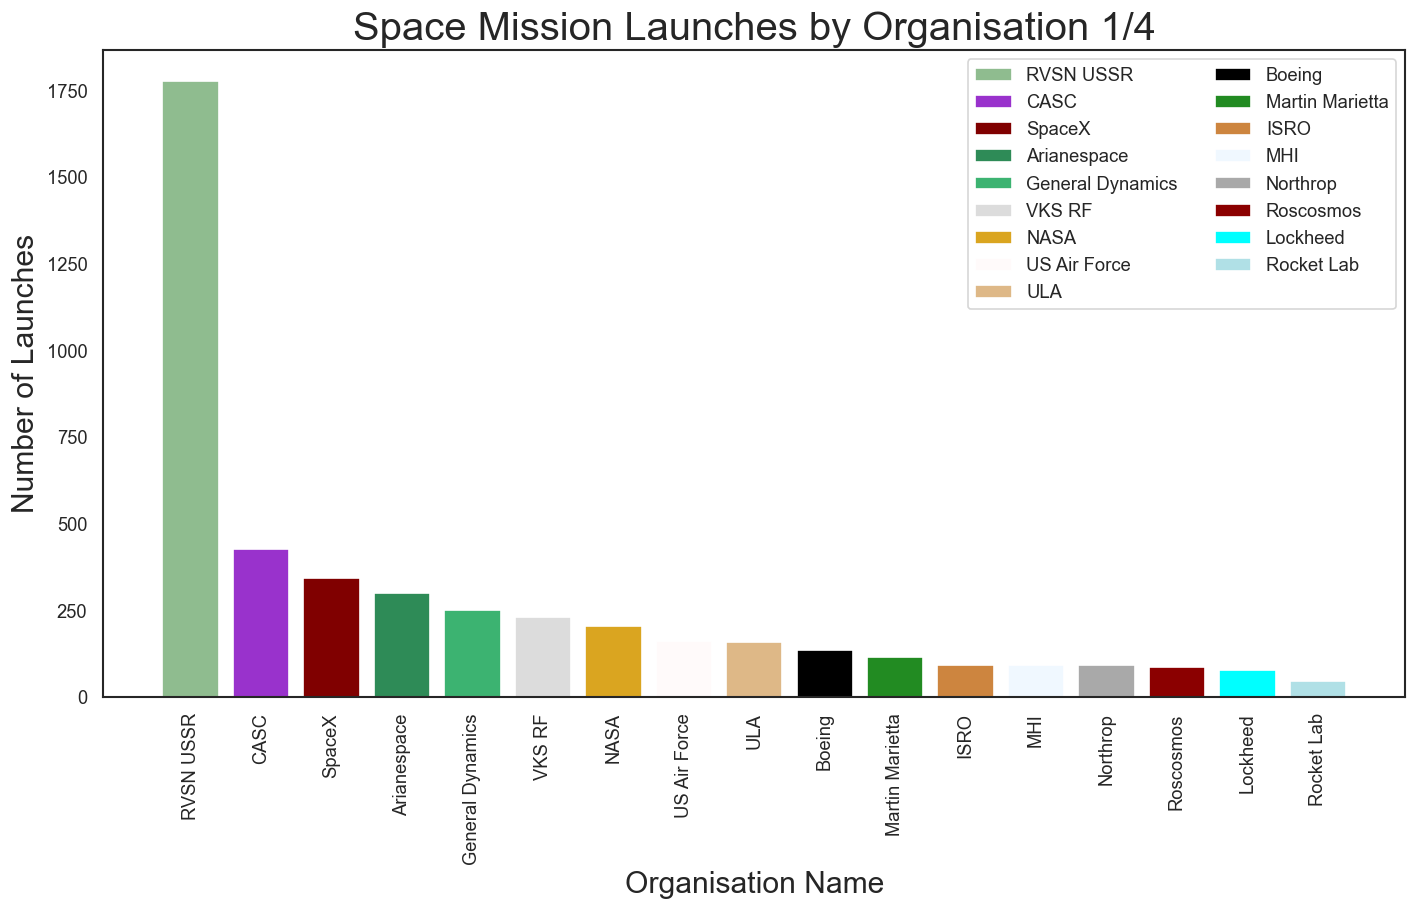

In [40]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

ax.bar(names_1,
       vals_1,
       label=names_1,
       color=colors_1)

ax.set_title("Space Mission Launches by Organisation 1/4", fontsize=24)
ax.set_xlabel("Organisation Name", fontsize=18)
ax.set_ylabel("Number of Launches", fontsize=18)
ax.legend(title="Organisation")

plt.legend(ncol=2)
plt.xticks(rotation=90)
plt.show()

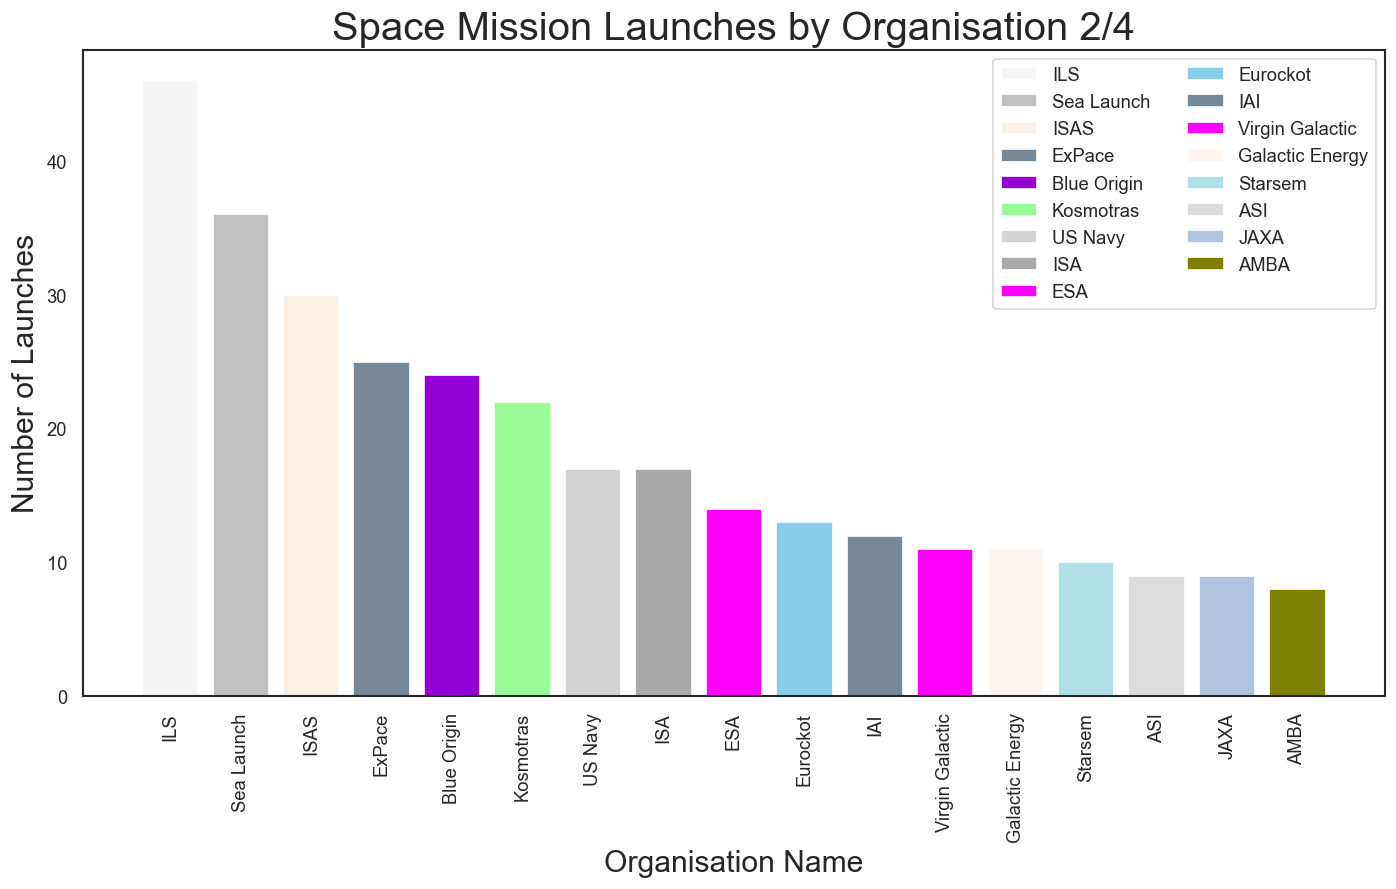

In [41]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

ax.bar(names_2,
       vals_2,
       label=names_2,
       color=colors_2)

ax.set_title("Space Mission Launches by Organisation 2/4", fontsize=24)
ax.set_xlabel("Organisation Name", fontsize=18)
ax.set_ylabel("Number of Launches", fontsize=18)
ax.legend(title="Organisation")

plt.legend(ncol=2)
plt.xticks(rotation=90)
plt.show()

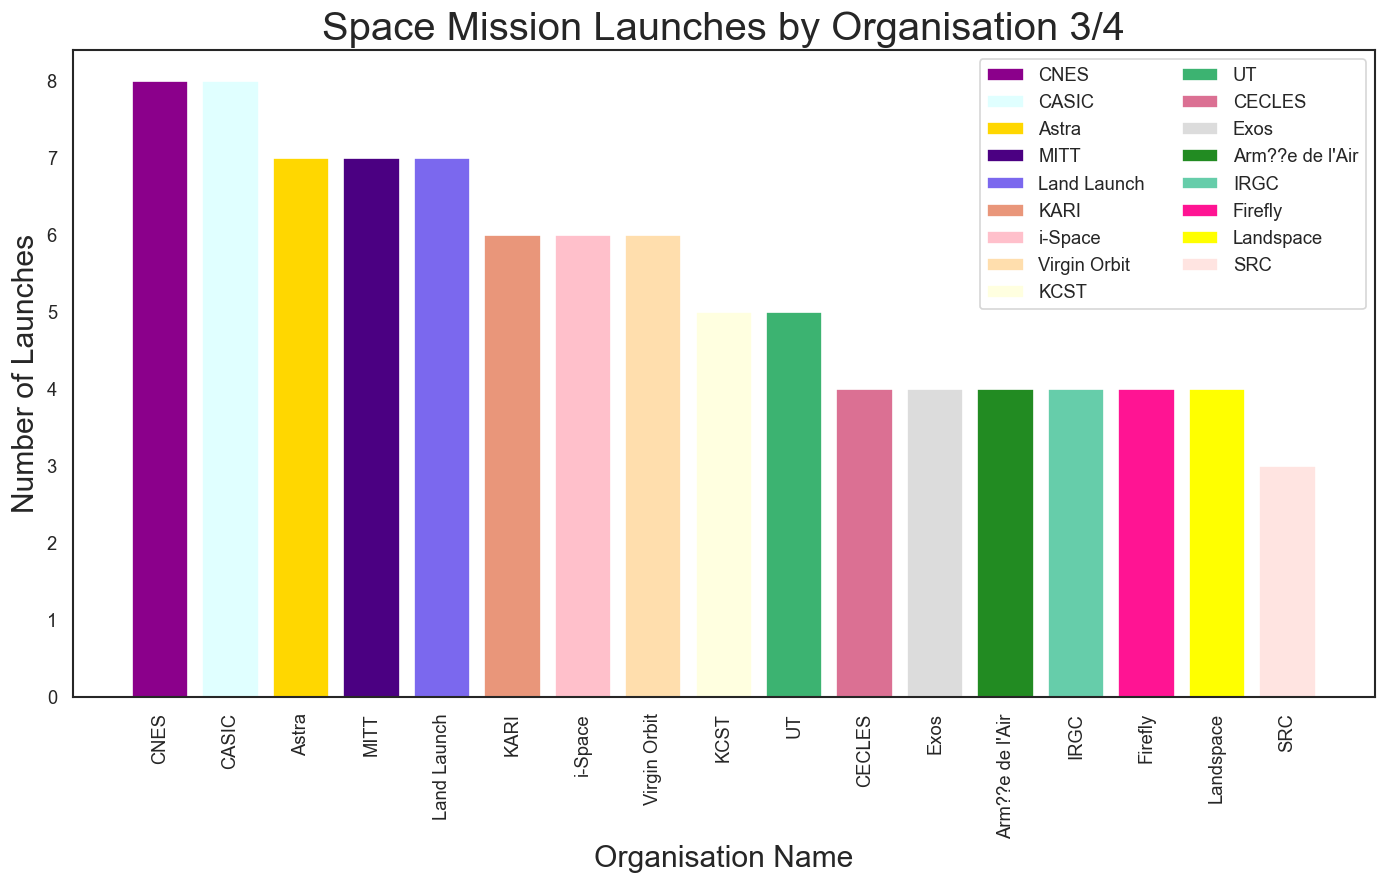

In [42]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

ax.bar(names_3,
       vals_3,
       label=names_3,
       color=colors_3)

ax.set_title("Space Mission Launches by Organisation 3/4", fontsize=24)
ax.set_xlabel("Organisation Name", fontsize=18)
ax.set_ylabel("Number of Launches", fontsize=18)
ax.legend(title="Organisation")

plt.legend(ncol=2)
plt.xticks(rotation=90)
plt.show()

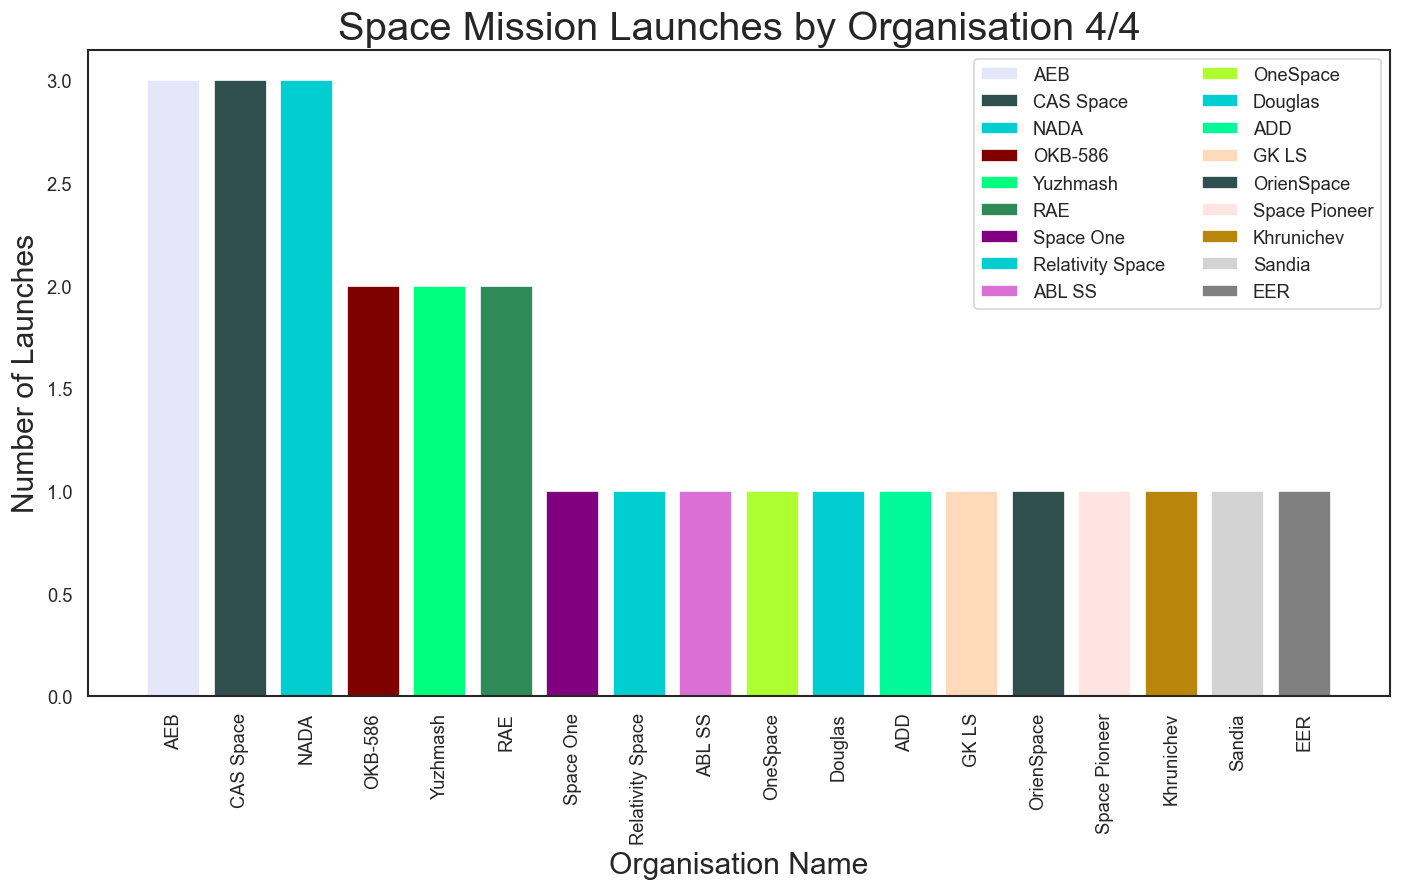

In [43]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

ax.bar(names_4,
       vals_4,
       label=names_4,
       color=colors_4)

ax.set_title("Space Mission Launches by Organisation 4/4", fontsize=24)
ax.set_xlabel("Organisation Name", fontsize=18)
ax.set_ylabel("Number of Launches", fontsize=18)
ax.legend(title="Organisation")

plt.legend(ncol=2)
plt.xticks(rotation=90)
plt.show()

That looks good for now!


---
---


## **_Number of Active versus Retired Rockets_**

How many rockets are active compared to those that are decomissioned?


In [44]:
rocket_status_value_counts = df_data.Rocket_Status.value_counts()

retired_val, active_val = rocket_status_value_counts.tolist()
retired_label, active_label = rocket_status_value_counts.index.tolist()

print(f"Number of {retired_label}: {retired_val}.")
print(f"Number of {active_label}: {active_val}.")

Number of StatusRetired: 3569.
Number of StatusActive: 1457.


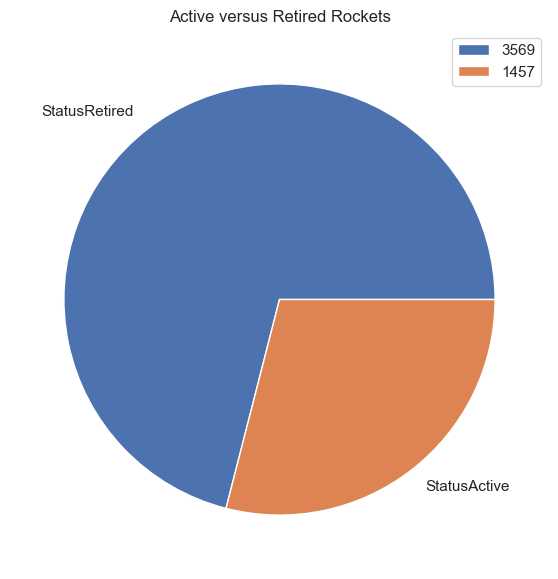

In [45]:
# Simplest plot:
plt.figure(figsize=(7, 7))
plt.title("Active versus Retired Rockets")

plt.pie(rocket_status_value_counts.tolist(),
        labels=rocket_status_value_counts.index.tolist())

plt.legend(rocket_status_value_counts.tolist())
plt.show()

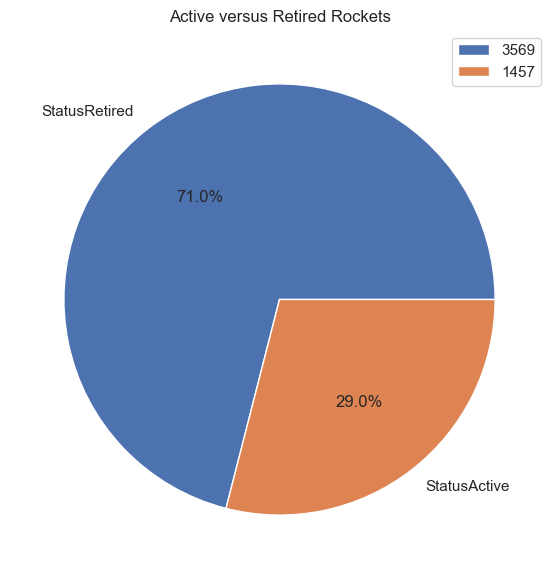

In [46]:
# More descriptive plot:
fix, ax = plt.subplots(figsize=(7, 7))

ax.pie(rocket_status_value_counts.tolist(),
       labels=rocket_status_value_counts.index.tolist(),
       autopct='%.1f%%')

ax.set_title("Active versus Retired Rockets")
plt.legend(rocket_status_value_counts.tolist())
plt.show()

---
---


## **_Distribution of Mission Status_**

How many missions were successful?
How many missions failed?


In [47]:
mission_statuses = df_data.Mission_Status.value_counts()

for i in range(len(mission_statuses)):
    result = mission_statuses.index.tolist()[i]
    num = mission_statuses.tolist()[i]
    print(f"{num} missions: {result}.")

4513 missions: Success.
369 missions: Failure.
106 missions: Partial Failure.
34 missions: Suborbital.
4 missions: Prelaunch Failure.


---
---


## **_How Expensive are the Launches?_**

Create a histogram and visualise the distribution.

The price column is given in USD millions (careful of missing values).


In [48]:
price_nan_num = df_data.Price_US_Mil.isna().sum()
price_valid_num = len(df_data.Price_US_Mil) - price_nan_num
print(f"`df_data` has {
      price_valid_num}/{len(df_data.Price_US_Mil)} entries for Price.")

`df_data` has 1555/5026 entries for Price.


In [49]:
price_series = df_data.Price_US_Mil.dropna()

# Or try:
# price_mask = pd.notna(df_data.Price)
# price_series = df_data[price_mask]

# price_series = df_data.loc[df_data.Price.notna(), 'Price']

#### **_w/Plotly Express `histogram()`:_**


In [50]:
price_histogram = px.histogram(
    x=price_series,
    opacity=0.75,
    marginal='box',
    nbins=35,
    barmode='overlay',
    width=750,
    height=500
)

price_histogram.update_layout(
    title="Histogram: Distribution of Rocket Prices",
    xaxis_title="Price: $Millions US",
    yaxis_title="Count",
    coloraxis_showscale=False
)

price_histogram.show()

#### **_w/Seaborn `histplot()`:_**


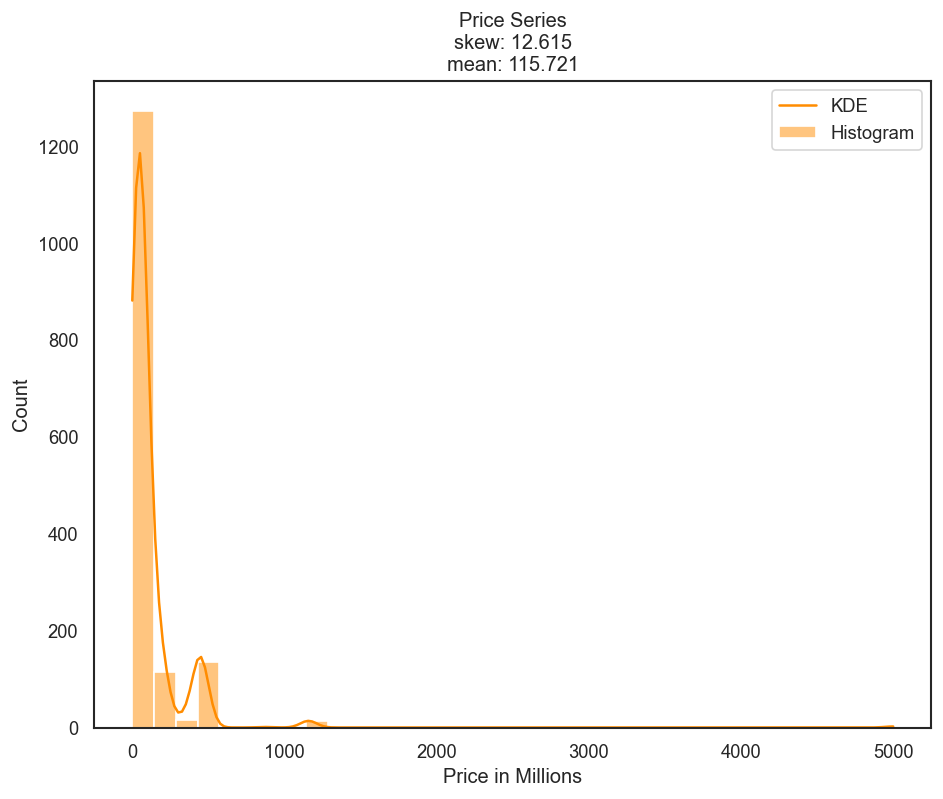

In [51]:
price_series_skew = np.round(price_series.skew(), 3)
price_series_mean = np.round(price_series.mean(), 3)

fig, ax = plt.subplots(figsize=(9, 7), dpi=120)

sns.histplot(price_series,
             kde=True,
             color='darkorange',
             legend=False,
             #  stat='density',
             ax=ax,
             alpha=0.5,
             bins=35)

sns.set_theme(style='whitegrid')

plt.title(f"Price Series\nskew: {price_series_skew}\nmean: {price_series_mean}")
plt.xlabel("Price in Millions", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.legend(labels=['KDE', 'Histogram'])

plt.show()

Compare w/param `log_scale=True`:


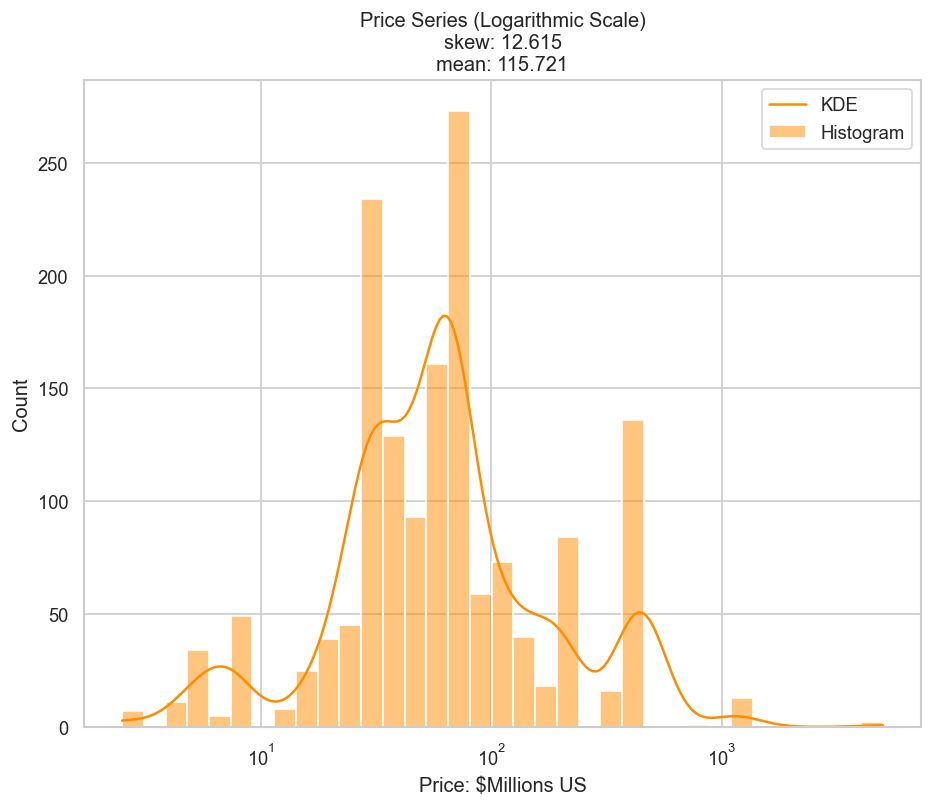

In [52]:
price_series_skew = np.round(price_series.skew(), 3)
price_series_mean = np.round(price_series.mean(), 3)

fig, ax = plt.subplots(figsize=(9, 7), dpi=120)

sns.histplot(price_series,
             kde=True,
             color='darkorange',
             legend=False,
             #  stat='density',
             ax=ax,
             alpha=0.5,
             log_scale=True,
             bins=35)

sns.set_theme(style='whitegrid')

plt.title(f"Price Series (Logarithmic Scale)\nskew: {price_series_skew}\nmean: {price_series_mean}")
plt.xlabel("Price: $Millions US", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.legend(labels=['KDE', 'Histogram'])

plt.show()

---
---


## **_Use a Choropleth Map to Show the Number of Launches by Country_**

-   Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)

-   Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

-   You'll need to extract a `country` feature as well as change the country names that no longer exist.

### **_Wrangle the Country Names_**

You'll need to use a 3 letter country code for each country. You might have to change some country names.

-   Russia is the Russian Federation

-   New Mexico should be USA

-   Yellow Sea refers to China

-   Shahrud Missile Test Site should be Iran

-   Pacific Missile Range Facility should be USA

-   Barents Sea should be Russian Federation

-   Gran Canaria should be USA

You can use the iso3166 package to convert the country names to Alpha3 format.


In [53]:
# # Background work:
# for i in countries:
#     print(i.name)
#     print(i.alpha2)
#     print(i.alpha3)
#     print(i.numeric)
#     print(i.apolitical_name)
#     print()

Research indicates that **Sea Launch**, indicated in the `country_rename` dict as "Pacific Ocean", had majority ownership by Russian interests, so I'm using RUS for that agency.

`country_rename` is a dict used to get country names that can then be converted succesfully in function `get_country_names` which references `iso3166.countries`.

`get_country_names` also accesses `countries_iso3166_dict`, which is used to achieve the final step of getting the 3-letter codes.

Create a list `country_names` while executing function `get_country_names` for clearer viewing of names when hovering over choropleth:


In [54]:
country_rename = {
    "Russia": "Russian Federation",
    "New Mexico": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran, Islamic Republic of",
    "Pacific Missile Range Facility": "USA",
    "Pacific Ocean": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA",
    "China Coastal Waters": "China",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "North Korea": "Korea, Democratic People's Republic of",
    "South Korea": "Korea, Republic of",
    "Iran": "Iran, Islamic Republic of",
}

countries_iso3166_dict = {}
for c in countries:
    countries_iso3166_dict[c.name] = c.alpha3
    countries_iso3166_dict[c.alpha2] = c.alpha3
    countries_iso3166_dict[c.alpha3] = c.alpha3
    countries_iso3166_dict[c.numeric] = c.alpha3
    countries_iso3166_dict[c.apolitical_name] = c.alpha3


def get_country_codes(location):
    country_name = location.split(",")[-1].strip()
    country_name = country_rename.get(country_name, country_name)
    countries_alpha3 = countries_iso3166_dict.get(country_name, None)
    return countries_alpha3

Create `series_country`, which will list country code for each launch in `df_data`:


In [55]:
series_country_codes = df_data.Location.apply(get_country_codes)

In [56]:
series_country_codes.unique()

array(['USA', 'CHN', 'NZL', 'RUS', 'KAZ', 'JPN', 'IND', 'IRN', 'KOR',
       'PRK', 'FRA', 'ISR', 'GBR', 'BRA', 'KEN', 'AUS'], dtype=object)

`country_value_counts` series allows us to see launch count for each country code:


In [57]:
country_launch_value_counts = series_country_codes.value_counts()

Create lists to facilitate smooth creation of DataFrame for country codes/counts:


In [58]:
country_launch_counts = [i for i in country_launch_value_counts]
country_codes = country_launch_value_counts.index

Create list of country names to add to `data_country` so hovering on choropleth will say the country name, not just the code:


In [59]:
country_name_dict = {}

for c in countries:
    country_name_dict[c.alpha3] = c.name

country_names = [country_name_dict[i] for i in country_codes]

country_names

['United States of America',
 'Russian Federation',
 'Kazakhstan',
 'China',
 'France',
 'Japan',
 'India',
 'New Zealand',
 'Iran, Islamic Republic of',
 'Israel',
 'Kenya',
 "Korea, Democratic People's Republic of",
 'Korea, Republic of',
 'Australia',
 'Brazil',
 'United Kingdom of Great Britain and Northern Ireland']

In [60]:
data_country = {"ISO_Code": country_codes,
                "Launches": country_launch_counts,
                "Country": country_names}

df_country = pd.DataFrame(data=data_country)

In [61]:
df_country

ISO_Code  Launches                                            Country
0       USA      1703                           United States of America
1       RUS      1440                                 Russian Federation
2       KAZ       732                                         Kazakhstan
3       CHN       487                                              China
4       FRA       324                                             France
5       JPN       137                                              Japan
6       IND        93                                              India
7       NZL        43                                        New Zealand
8       IRN        21                          Iran, Islamic Republic of
9       ISR        12                                             Israel
10      KEN         9                                              Kenya
11      PRK         8             Korea, Democratic People's Republic of
12      KOR         7                                 Korea, Republic of
13      AUS         6                                          Australia
14      BRA         3                                             Brazil
15      GBR         1  United Kingdom of Great Britain and Northern I...

In [62]:
color_scales = px.colors.named_colorscales()

In [63]:
from random import choice

random_color = choice(color_scales)

I experimented with `color_continuous_scale=random_color`.

Ended up liking 'rainbow'.


In [64]:
fig = px.choropleth(
    df_country,
    locations="ISO_Code",
    color="Launches",
    hover_name="Country",
    color_continuous_scale="rainbow",
    # width=1920,
    # height=1080,
)

fig.update_layout(
    title_text="Rocket Launches by Country (Choropleth Map)",
    title_font_size=20,
    title_font_family="Courier New",
    title_xref="paper",
)

fig.show()

---
---


## **_Use a Choropleth Map to Show the Number of Failures by Country_**


Add a country code column to original DF for ease of reference:


In [65]:
df_data.insert(2, "ISO_Code", series_country_codes)

In [66]:
df_data.sample()

Organisation                                Location ISO_Code  \
2512    RVSN USSR  Site 32/1, Plesetsk Cosmodrome, Russia      RUS   

                          Date                   Detail  Rocket_Status  \
2512 1990-07-30 00:06:00+00:00  Tsyklon-3 | Cosmos 2088  StatusRetired   

      Price_US_Mil Mission_Status  
2512           NaN        Success

Also add a country name column to original DF for ease of reference:


In [67]:
def get_country_names(iso_code):
    country_name = country_name_dict.get(iso_code)
    return country_name


series_country_names = df_data.ISO_Code.apply(get_country_names)

In [68]:
df_data.insert(2, "Country_Name", series_country_names)

In [69]:
df_data.sample()

Organisation                                 Location  \
3351    RVSN USSR  Site 132/1, Plesetsk Cosmodrome, Russia   

            Country_Name ISO_Code                      Date  \
3351  Russian Federation      RUS 1977-11-24 14:30:00+00:00   

                               Detail  Rocket_Status  Price_US_Mil  \
3351  Cosmos-3M (11K65M) | Cosmos 963  StatusRetired           NaN   

     Mission_Status  
3351        Success

See what status there are:


In [70]:
series_mission_status = df_data["Mission_Status"].value_counts()
series_mission_status

Mission_Status
Success              4513
Failure               369
Partial Failure       106
Suborbital             34
Prelaunch Failure       4
Name: count, dtype: int64

Consider a df for each status to map each case:


In [71]:
df_failure = df_data.loc[df_data["Mission_Status"] == "Failure"]

# df_success = df_data.loc[df_data["Mission_Status"] == "Success"]
# df_partial_failure = df_data.loc[df_data["Mission_Status"] == "Partial_Failure"]
# df_suborbital = df_data.loc[df_data["Mission_Status"] == "Suborbital"]
# df_prelaunch_failure = df_data.loc[df_data["Mission_Status"] == "Prelaunch Failure"]

In [72]:
df_by_failure = df_failure.groupby(["ISO_Code"])["Mission_Status"].count(
).reset_index(name="Count").sort_values(["Count"])

Add column w/Country Names for clarity when hovering:


In [73]:
df_by_failure_country_names = df_by_failure.ISO_Code.apply(get_country_names)

In [74]:
df_by_failure.insert(1, "Country_Name", df_by_failure_country_names)

### **_Choropleth Mapping Launch Failures:_**


In [75]:
random_color = choice(color_scales)

fig = px.choropleth(
    df_by_failure,
    locations="ISO_Code",
    color="Count",
    hover_name="Country_Name",
    color_continuous_scale="rainbow",
)

fig.update_layout(
    title_text=f"Mission Failures Choropleth ({random_color})",
    title_font_size=20,
    title_font_family="Courier New",
    title_xref="paper",
)

fig.show()

---
---


## **_Create a Plotly Sunburst Chart of the countries, organisations, and mission status._**


---


#### **_Background on `groupby()` and `px.sunburst()`:_**


In [76]:
df_doc_animals = pd.DataFrame({
    'Species': ['Primate', 'Primate', 'Bird', 'Bird', 'Bird', 'Bird'],
    'Animal': ['Gorilla', 'Human', 'Falcon', 'Falcon', 'Parrot', 'Parrot'],
    'Max Speed': [25., 17., 380., 370., 24., 24.],
    'Names': ['Golliver', 'Bruna', 'Filbo', 'Jed', 'Filba', 'Ruina'],
})

df_doc_animals

Species   Animal  Max Speed     Names
0  Primate  Gorilla      25.00  Golliver
1  Primate    Human      17.00     Bruna
2     Bird   Falcon     380.00     Filbo
3     Bird   Falcon     370.00       Jed
4     Bird   Parrot      24.00     Filba
5     Bird   Parrot      24.00     Ruina

In [77]:
df_doc_animals = df_doc_animals.groupby(['Animal', 'Max Speed'])

df_doc_animals

In [78]:
df_doc_animals = df_doc_animals.size()

df_doc_animals

Animal   Max Speed
Falcon   370.00       1
         380.00       1
Gorilla  25.00        1
Human    17.00        1
Parrot   24.00        2
dtype: int64

In [79]:
df_doc_animals = df_doc_animals.reset_index(name='count')

df_doc_animals

Animal  Max Speed  count
0   Falcon     370.00      1
1   Falcon     380.00      1
2  Gorilla      25.00      1
3    Human      17.00      1
4   Parrot      24.00      2

In [80]:
burst_animals = px.sunburst(df_doc_animals,
                            path=["Animal",
                                  "Max Speed"],
                            values="count",
                            title="Animals Sunburst: Animal -> Max Speed")

burst_animals.update_layout(xaxis_title="Animal",
                            yaxis_title="Max Speed",
                            coloraxis_showscale=False,
                            width=450,
                            height=450)

burst_animals.show()

### **_The Task:_**


Break the process into steps:

<font size=1>

```python
# Group DF "Country_Name"/"Organisation"/"Mission_Status":
country_org_status = df_data.groupby(by=["Country_Name",
                                         "Organisation",
                                         "Mission_Status"])

# Calculate the size of each group/the count of occurrences for each unique combination
#  and assign as a Series:
country_org_status = country_org_status.size()

# Reset index of the resulting Series/rename the count column to 'count' &
#  rebuild the DF:
country_org_status = country_org_status.reset_index(name='count')
```

</font>


In [81]:
country_org_status = df_data.groupby(by=["Country_Name",
                                         "Organisation",
                                         "Mission_Status"]).size().reset_index(name='count')

In [82]:
burst = px.sunburst(country_org_status,
                    path=["Country_Name",
                          "Organisation",
                          "Mission_Status"],
                    values="count",
                    title="Space Launches Sunburst: Countries/Agencies/Mission Status")

burst.update_layout(xaxis_title="Mission Status",
                    yaxis_title="Organisation",
                    coloraxis_showscale=False,
                    width=750,
                    height=750)

burst.show()

---
---


## **_Analyse the Total Amount of Money Spent by Organisations on Space Missions_**


In [83]:
df_org_price = df_data.filter(["Organisation", "Price_US_Mil"], axis=1)

In [84]:
len(df_org_price)

5026

Remove entries/rows without entries in Price column:


In [85]:
df_org_price = df_org_price[df_org_price["Price_US_Mil"].notna()]

In [86]:
df_org_price

Organisation  Price_US_Mil
0           SpaceX         67.00
1           SpaceX         67.00
3       Rocket Lab          7.50
4           SpaceX         67.00
5             CASC         29.75
...            ...           ...
4558  US Air Force         59.00
4674  US Air Force         63.23
4696  US Air Force         63.23
4703  US Air Force         63.23
4723  US Air Force         63.23

[1555 rows x 2 columns]

In [87]:
df_org_price.describe()

Price_US_Mil
count      1,555.00
mean         115.72
std          234.69
min            2.50
25%           30.80
50%           64.68
75%           97.00
max        5,000.00

In [88]:
len(df_org_price)

1555

In [89]:
df_org_spending = df_org_price.groupby(["Organisation"])["Price_US_Mil"].sum()
df_org_spending = df_org_spending.reset_index(name="Spending_US_Mil")

In [90]:
bar_colors = choices(css_colors, k=len(df_org_spending))

Plot `df_org_spending`:


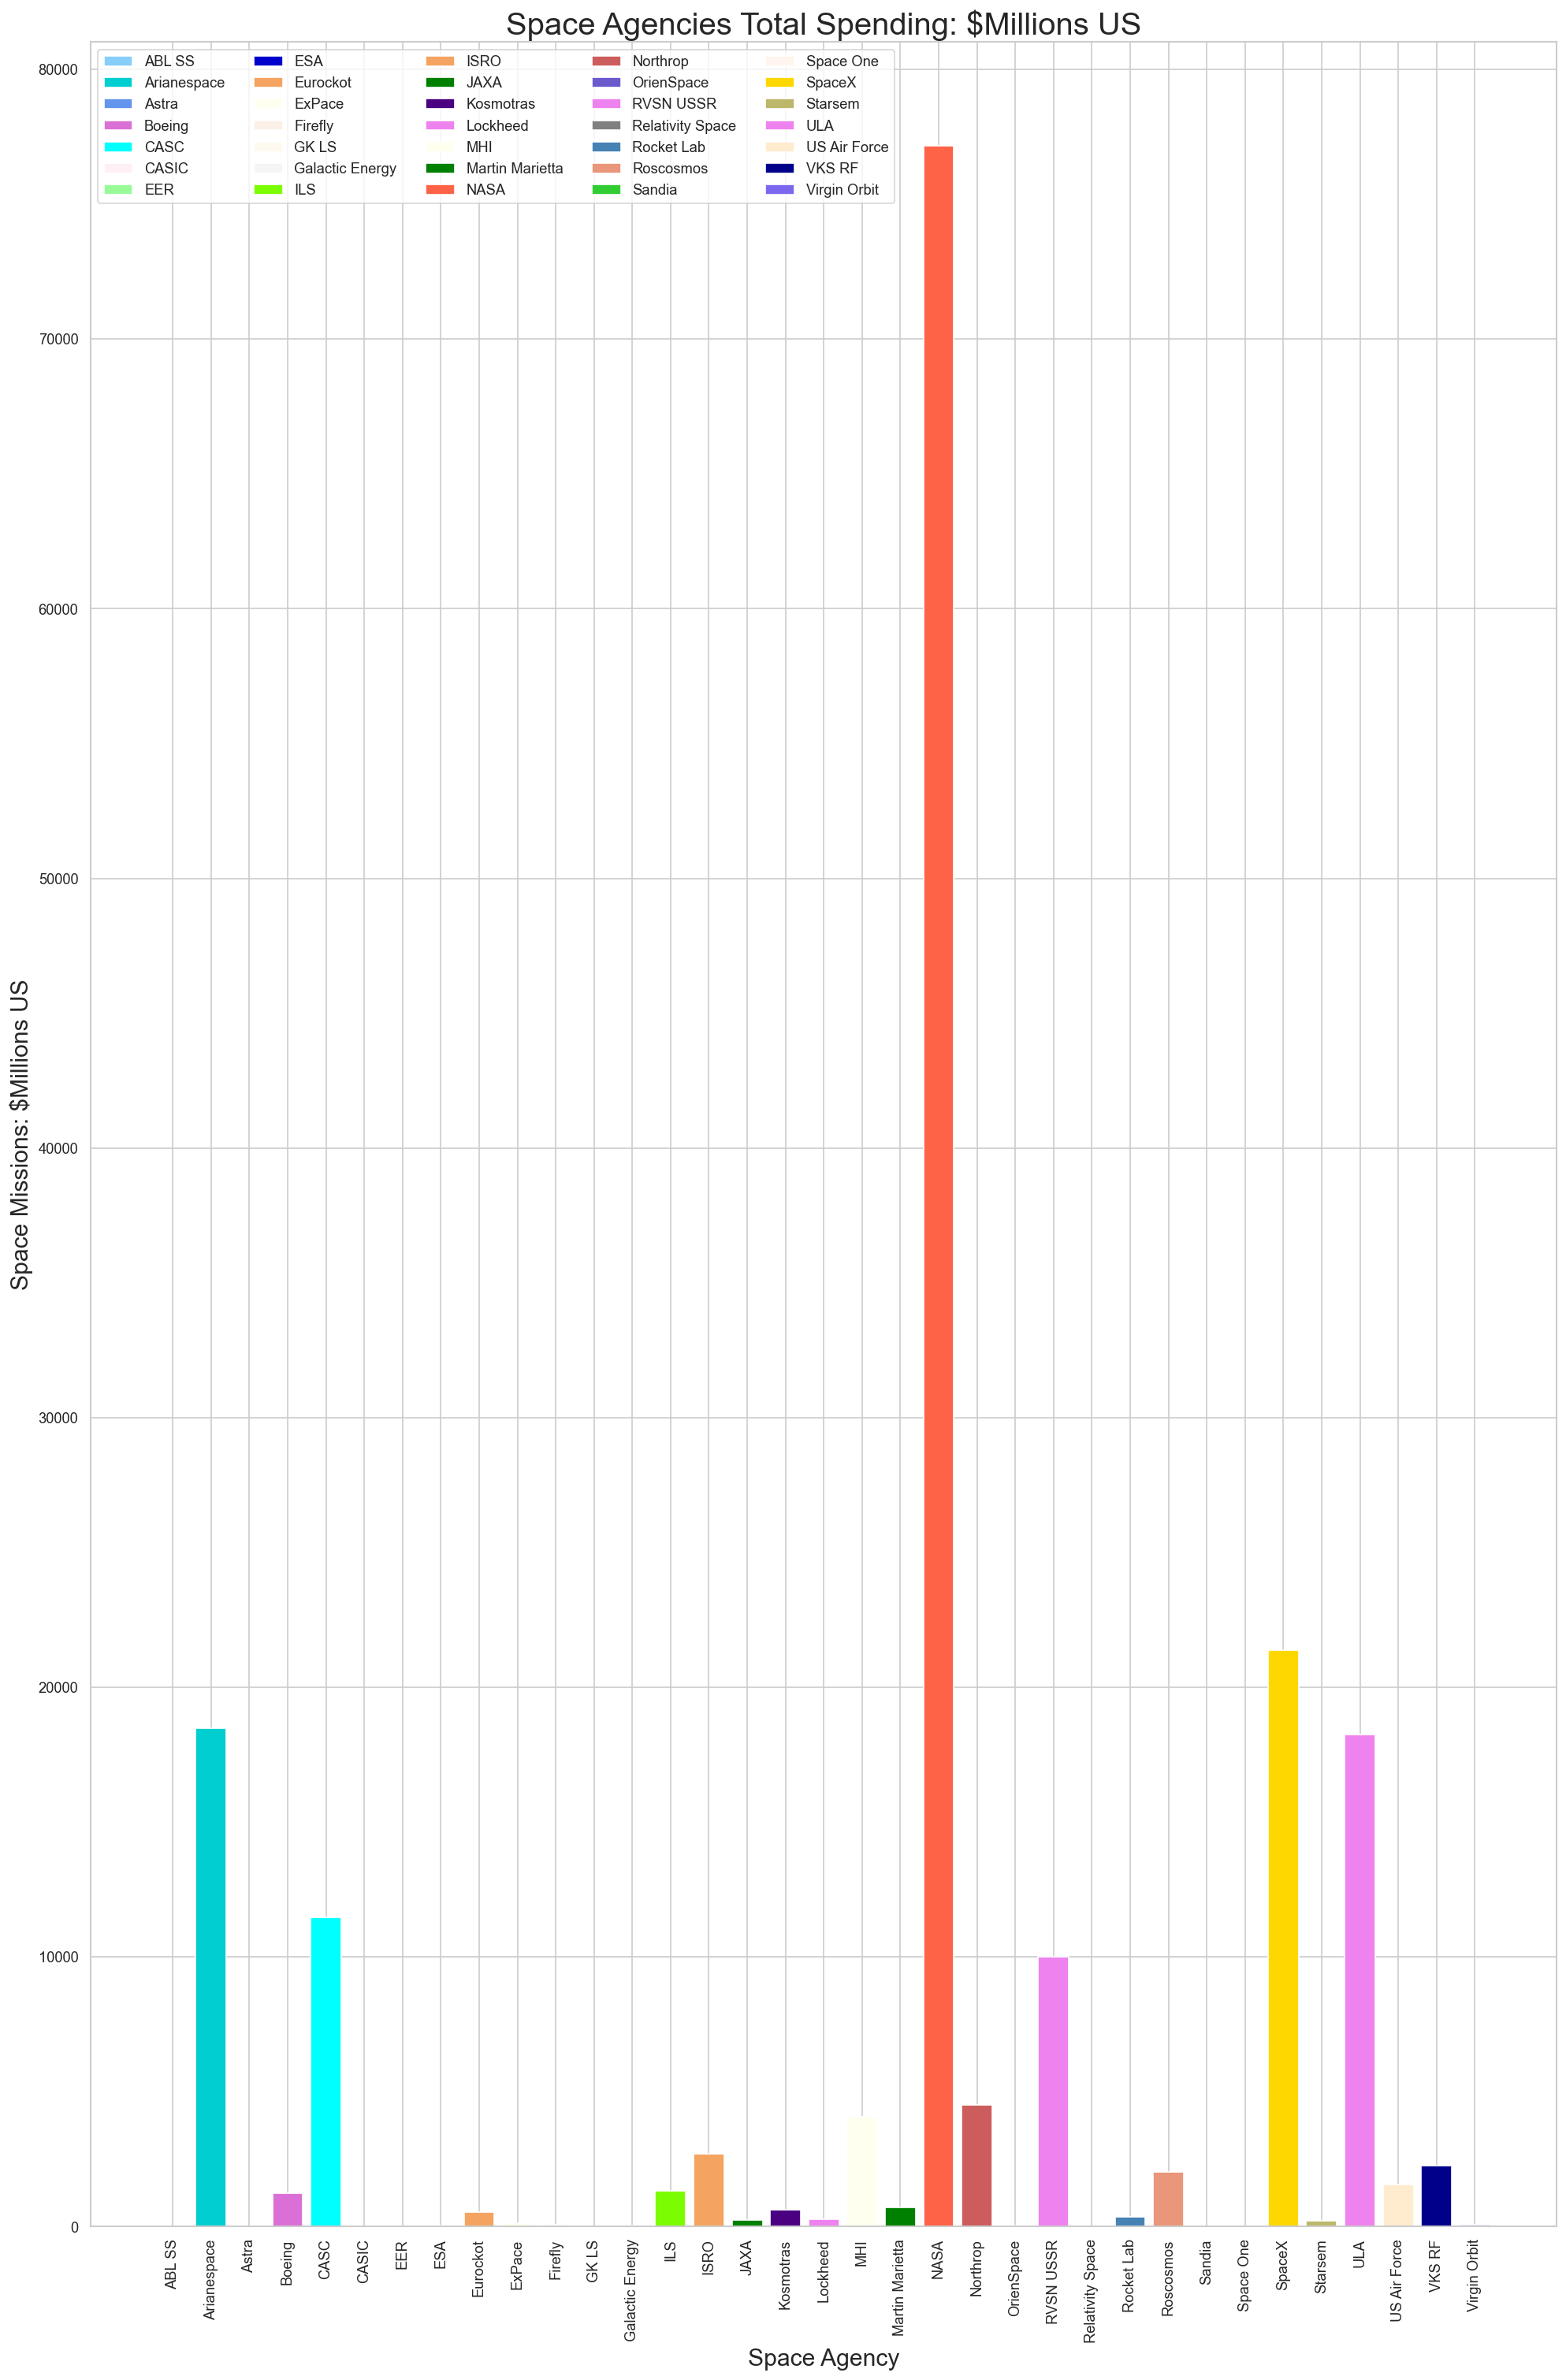

In [91]:
fig, ax = plt.subplots(figsize=(20, 30), dpi=120)

ax.bar(df_org_spending['Organisation'],
       df_org_spending['Spending_US_Mil'],
       label=df_org_spending['Organisation'],
       color=bar_colors)

ax.set_title("Space Agencies Total Spending: $Millions US", fontsize=24)
ax.set_xlabel('Space Agency', fontsize=18)
ax.set_ylabel('Space Missions: $Millions US', fontsize=18)
ax.legend(title="Agencies")

ax.legend(ncol=5)
plt.xticks(rotation=90)
plt.show()

We need to break `df_org_spending` into chunks, since the range of values makes it hard to see the data clearly in the plot...


Create four subplots:


In [92]:
color_list = ['black', 'blue', 'brown', 'chocolate', 'cornflowerblue', 'crimson',
              'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgreen', 'darkkhaki',
              'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred',
              'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray',
              'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'dimgray',
              'dodgerblue', 'firebrick', 'forestgreen', 'goldenrod', 'green', 
              'greenyellow', 'indigo', 'lightgreen', 'limegreen', 'maroon', 'mediumblue', 
              'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'midnightblue', 
              'navy', 'olive', 'olivedrab', 'palegreen', 'peru', 'purple',
              'rebeccapurple', 'rosybrown', 'royalblue', 'saddlebrown', 'sandybrown', 
              'seagreen', 'sienna', 'slateblue', 'springgreen', 'steelblue', 'yellowgreen']

In [93]:
df_org_spending_01 = df_org_spending[df_org_spending["Spending_US_Mil"] >= 7500]

df_org_spending_02 = df_org_spending[(df_org_spending["Spending_US_Mil"] < 7500) & (
    df_org_spending["Spending_US_Mil"] >= 1250)]

df_org_spending_03 = df_org_spending[(df_org_spending["Spending_US_Mil"] < 1250) & (
    df_org_spending["Spending_US_Mil"] >= 200)]

df_org_spending_04 = df_org_spending[(df_org_spending["Spending_US_Mil"] < 200) & (
    df_org_spending["Spending_US_Mil"] >= 20)]

df_org_spending_05 = df_org_spending[df_org_spending["Spending_US_Mil"] < 20]

In [94]:
spending_ranges = [(df_org_spending_01, "High Spending"),
                   (df_org_spending_02, "Medium-High Spending"),
                   (df_org_spending_03, "Medium Spending"),
                   (df_org_spending_04, "Medium-Low Spending"),
                   (df_org_spending_05, "Low Spending")]

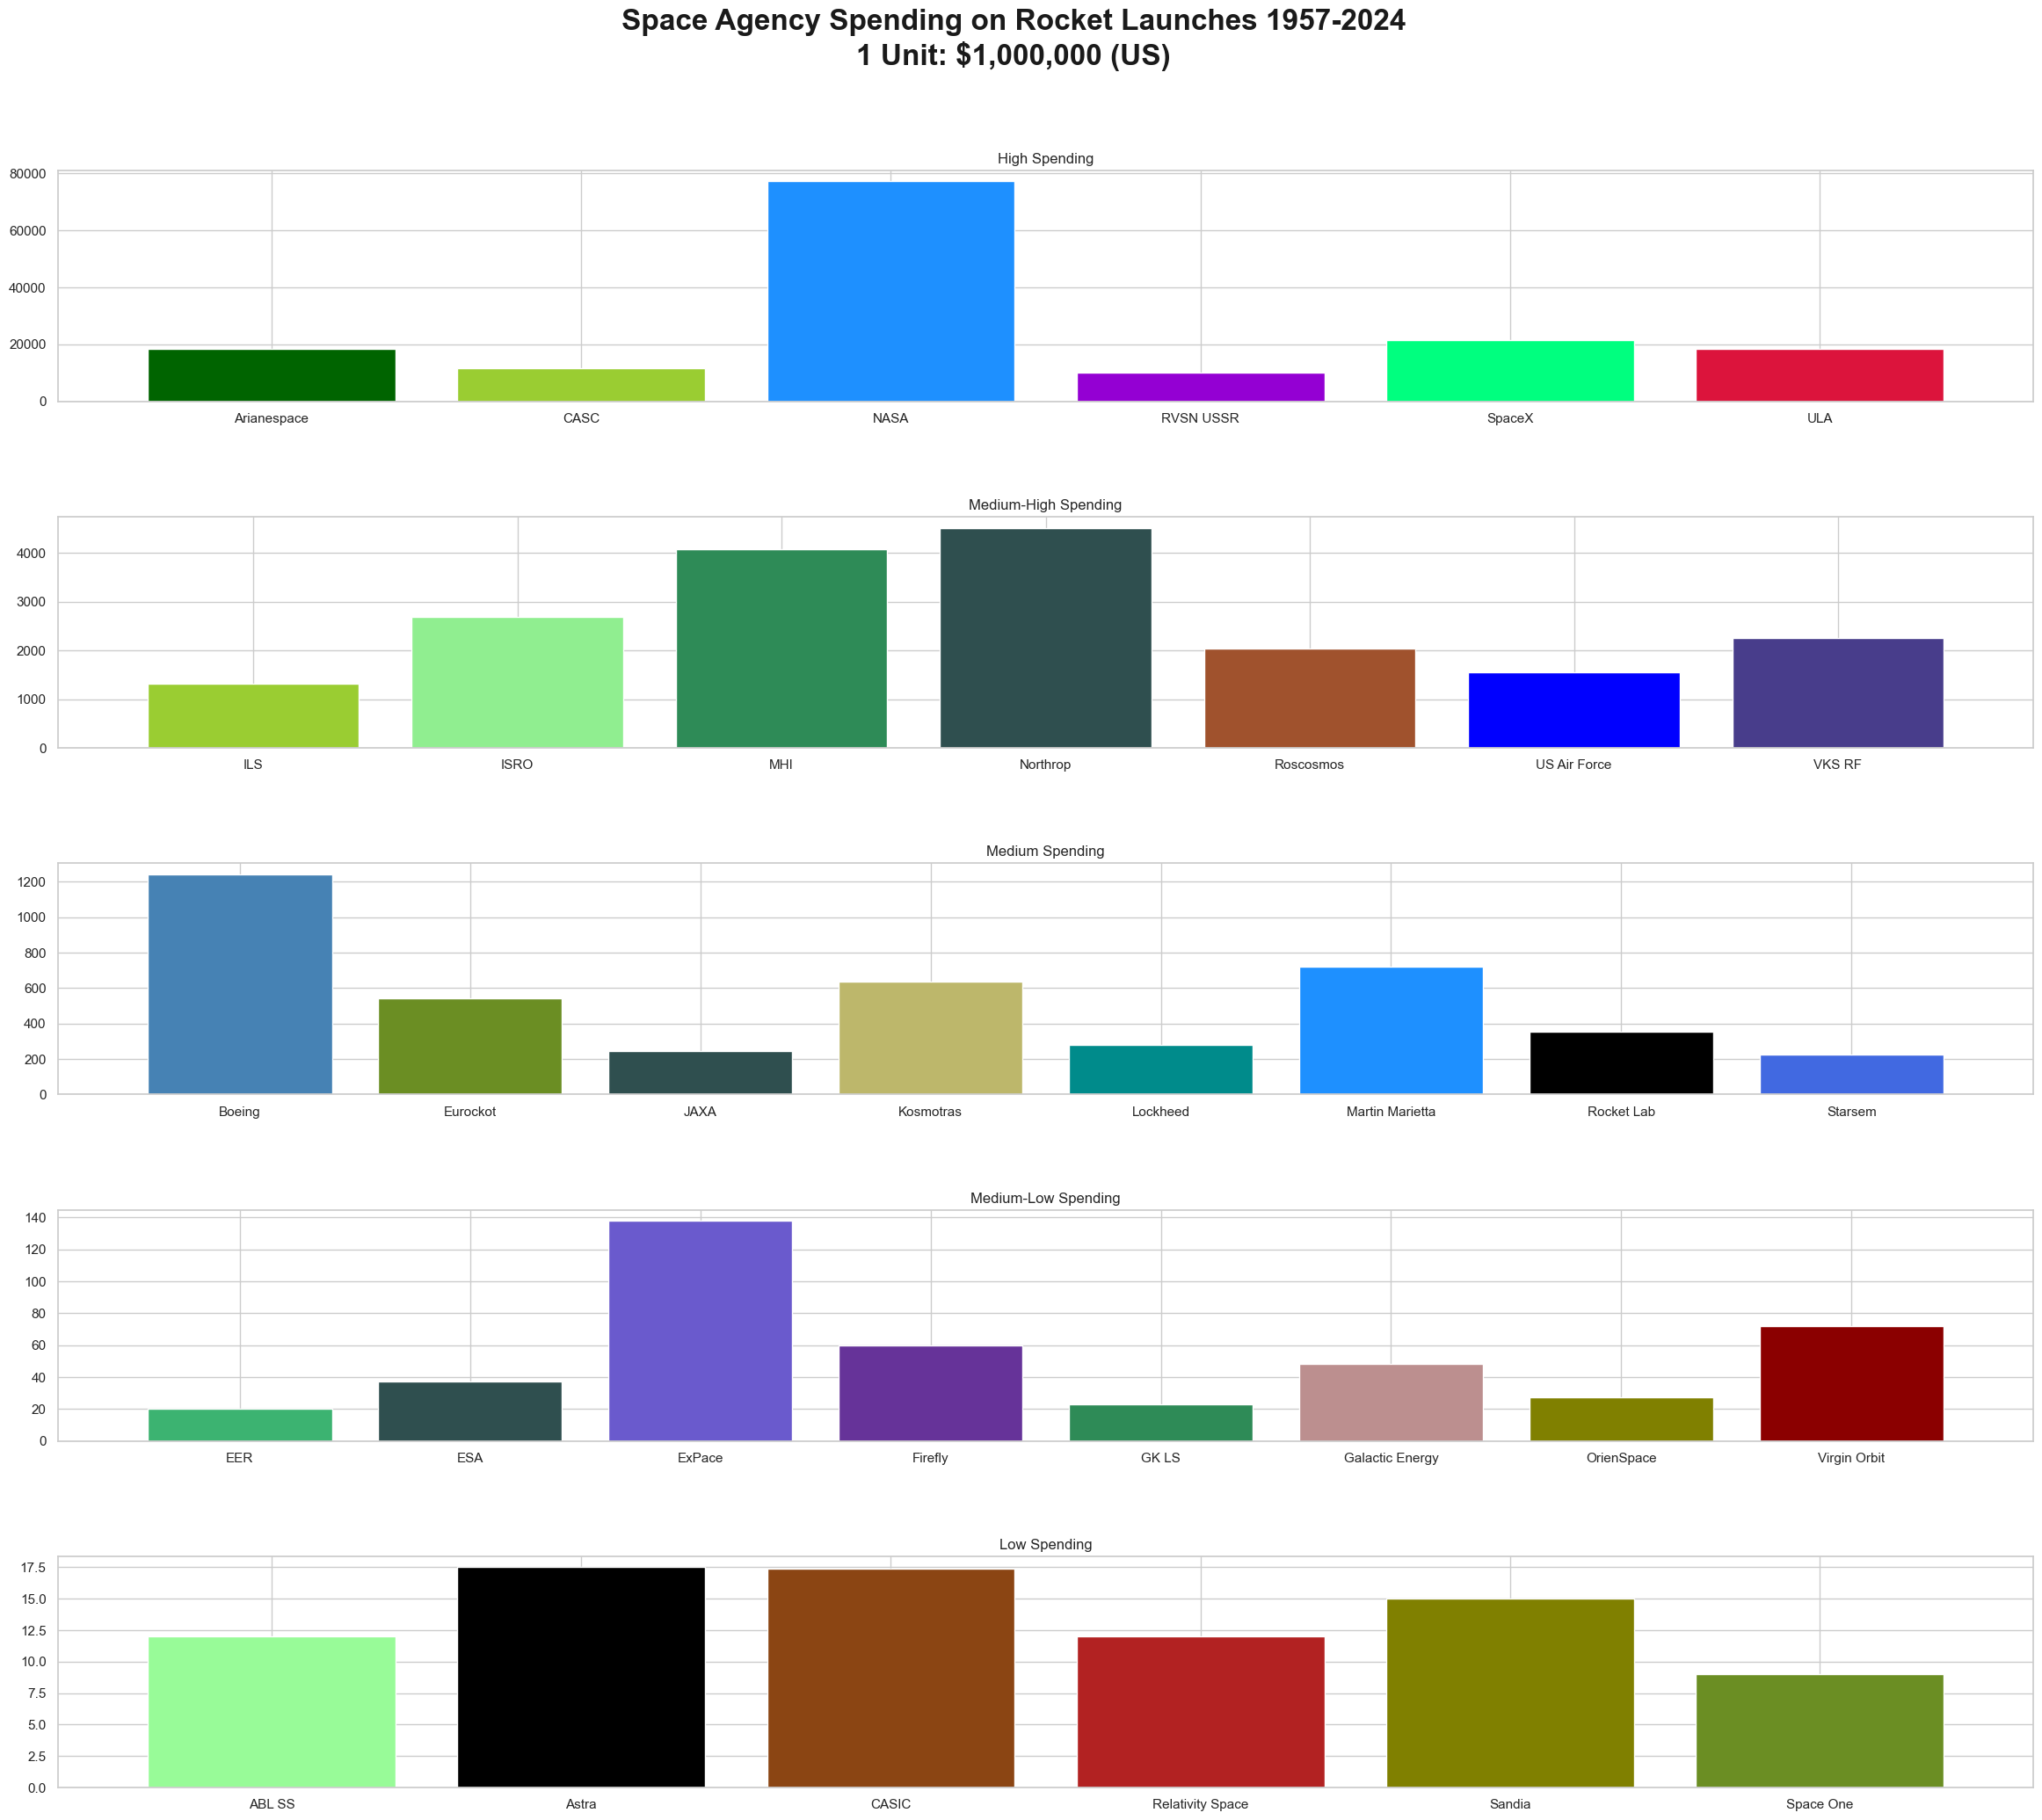

In [95]:
fig, axes = plt.subplots(nrows=len(spending_ranges), figsize=(29, 23))

for (df, title), ax in zip(spending_ranges, axes):
    ax.bar(df["Organisation"],
           df["Spending_US_Mil"],
           color=choices(color_list, k=len(df)))
    ax.set_title(title)

plt.subplots_adjust(
    bottom=0.1,
    top=0.9,
    hspace=0.5,
)

plt.suptitle(t="Space Agency Spending on Rocket Launches 1957-2024\n1 Unit: $1,000,000 (US)",
             size=24, weight="bold", color="k")

plt.rcParams.update({
    "grid.color": "gainsboro",
    "axes.facecolor": "mintcream",
})

plt.show()

---
---


## **_Analyse the Amount of Money Spent by Organisation per Launch_**


Now, reference the earlier `df_org_price` in creating a DataFrame with the average spending per launch:


Before, we got the total spending this w/`groupby().sum()`.

<font size=1>

```python
df_org_price = df_data.filter(["Organisation", "Price"], axis=1)
df_org_price = df_org_price[df_org_price["Price"].notna()]

df_org_spending = df_org_price.groupby(["Organisation"])["Price"].sum()
df_org_spending = df_org_spending.reset_index(name="Spending")
```

</font>

We'll try a different approach for getting the average...


In [96]:
df_org_spending_mean = df_org_price.groupby(
    ["Organisation"])["Price_US_Mil"].mean()

df_org_spending_mean = df_org_spending_mean.reset_index(
    name="Average_Spending")

In [97]:
df_org_spending_mean.describe()

Average_Spending
count             35.00
mean             199.94
std              840.16
min                2.50
25%               13.50
50%               35.00
75%               61.81
max            5,000.00

Instead of breaking `df_org_spending` into chunks by value, we'll simply divide it up evenly into 7 parts (5 wasn't enough for previous plot):


First, sort the DataFrame by value high to low...


In [98]:
df_org_spending_mean.sort_values(
    by='Average_Spending', inplace=True, ascending=False)

In [99]:
df_org_spending_mean

Organisation  Average_Spending
23         RVSN USSR          5,000.00
20              NASA            514.37
3             Boeing            177.29
1        Arianespace            160.76
31               ULA            157.30
13               ILS            101.54
18               MHI             92.78
19   Martin Marietta             80.16
29            SpaceX             63.98
32      US Air Force             59.65
21          Northrop             49.67
15              JAXA             49.20
8           Eurockot             41.80
33            VKS RF             40.35
4               CASC             38.50
7                ESA             37.00
26         Roscosmos             36.98
17          Lockheed             35.00
14              ISRO             33.64
16         Kosmotras             29.00
22        OrienSpace             27.22
30           Starsem             25.00
11             GK LS             23.00
6                EER             20.00
10           Firefly             15.00
27            Sandia             15.00
0             ABL SS             12.00
24  Relativity Space             12.00
34      Virgin Orbit             12.00
28         Space One              9.00
9             ExPace              8.61
25        Rocket Lab              7.50
5              CASIC              5.80
12   Galactic Energy              4.38
2              Astra              2.50

In [100]:
mean_01 = df_org_spending_mean[df_org_spending_mean["Average_Spending"] >= 180]

mean_02 = df_org_spending_mean[(df_org_spending_mean["Average_Spending"] < 180) & (
    df_org_spending_mean["Average_Spending"] >= 60)]

mean_03 = df_org_spending_mean[(df_org_spending_mean["Average_Spending"] < 60) & (
    df_org_spending_mean["Average_Spending"] >= 36)]

mean_04 = df_org_spending_mean[(df_org_spending_mean["Average_Spending"] < 36) & (
    df_org_spending_mean["Average_Spending"] >= 13)]

mean_05 = df_org_spending_mean[df_org_spending_mean["Average_Spending"] < 13]

Now create a plot similar to the previous:


In [101]:
average_ranges = [(mean_01, "Most Average Spending"),
                  (mean_02, "2nd Most Average Spending"),
                  (mean_03, "Median Average Spending"),
                  (mean_04, "2nd Least Average Spending"),
                  (mean_05, "Least Average Spending")]

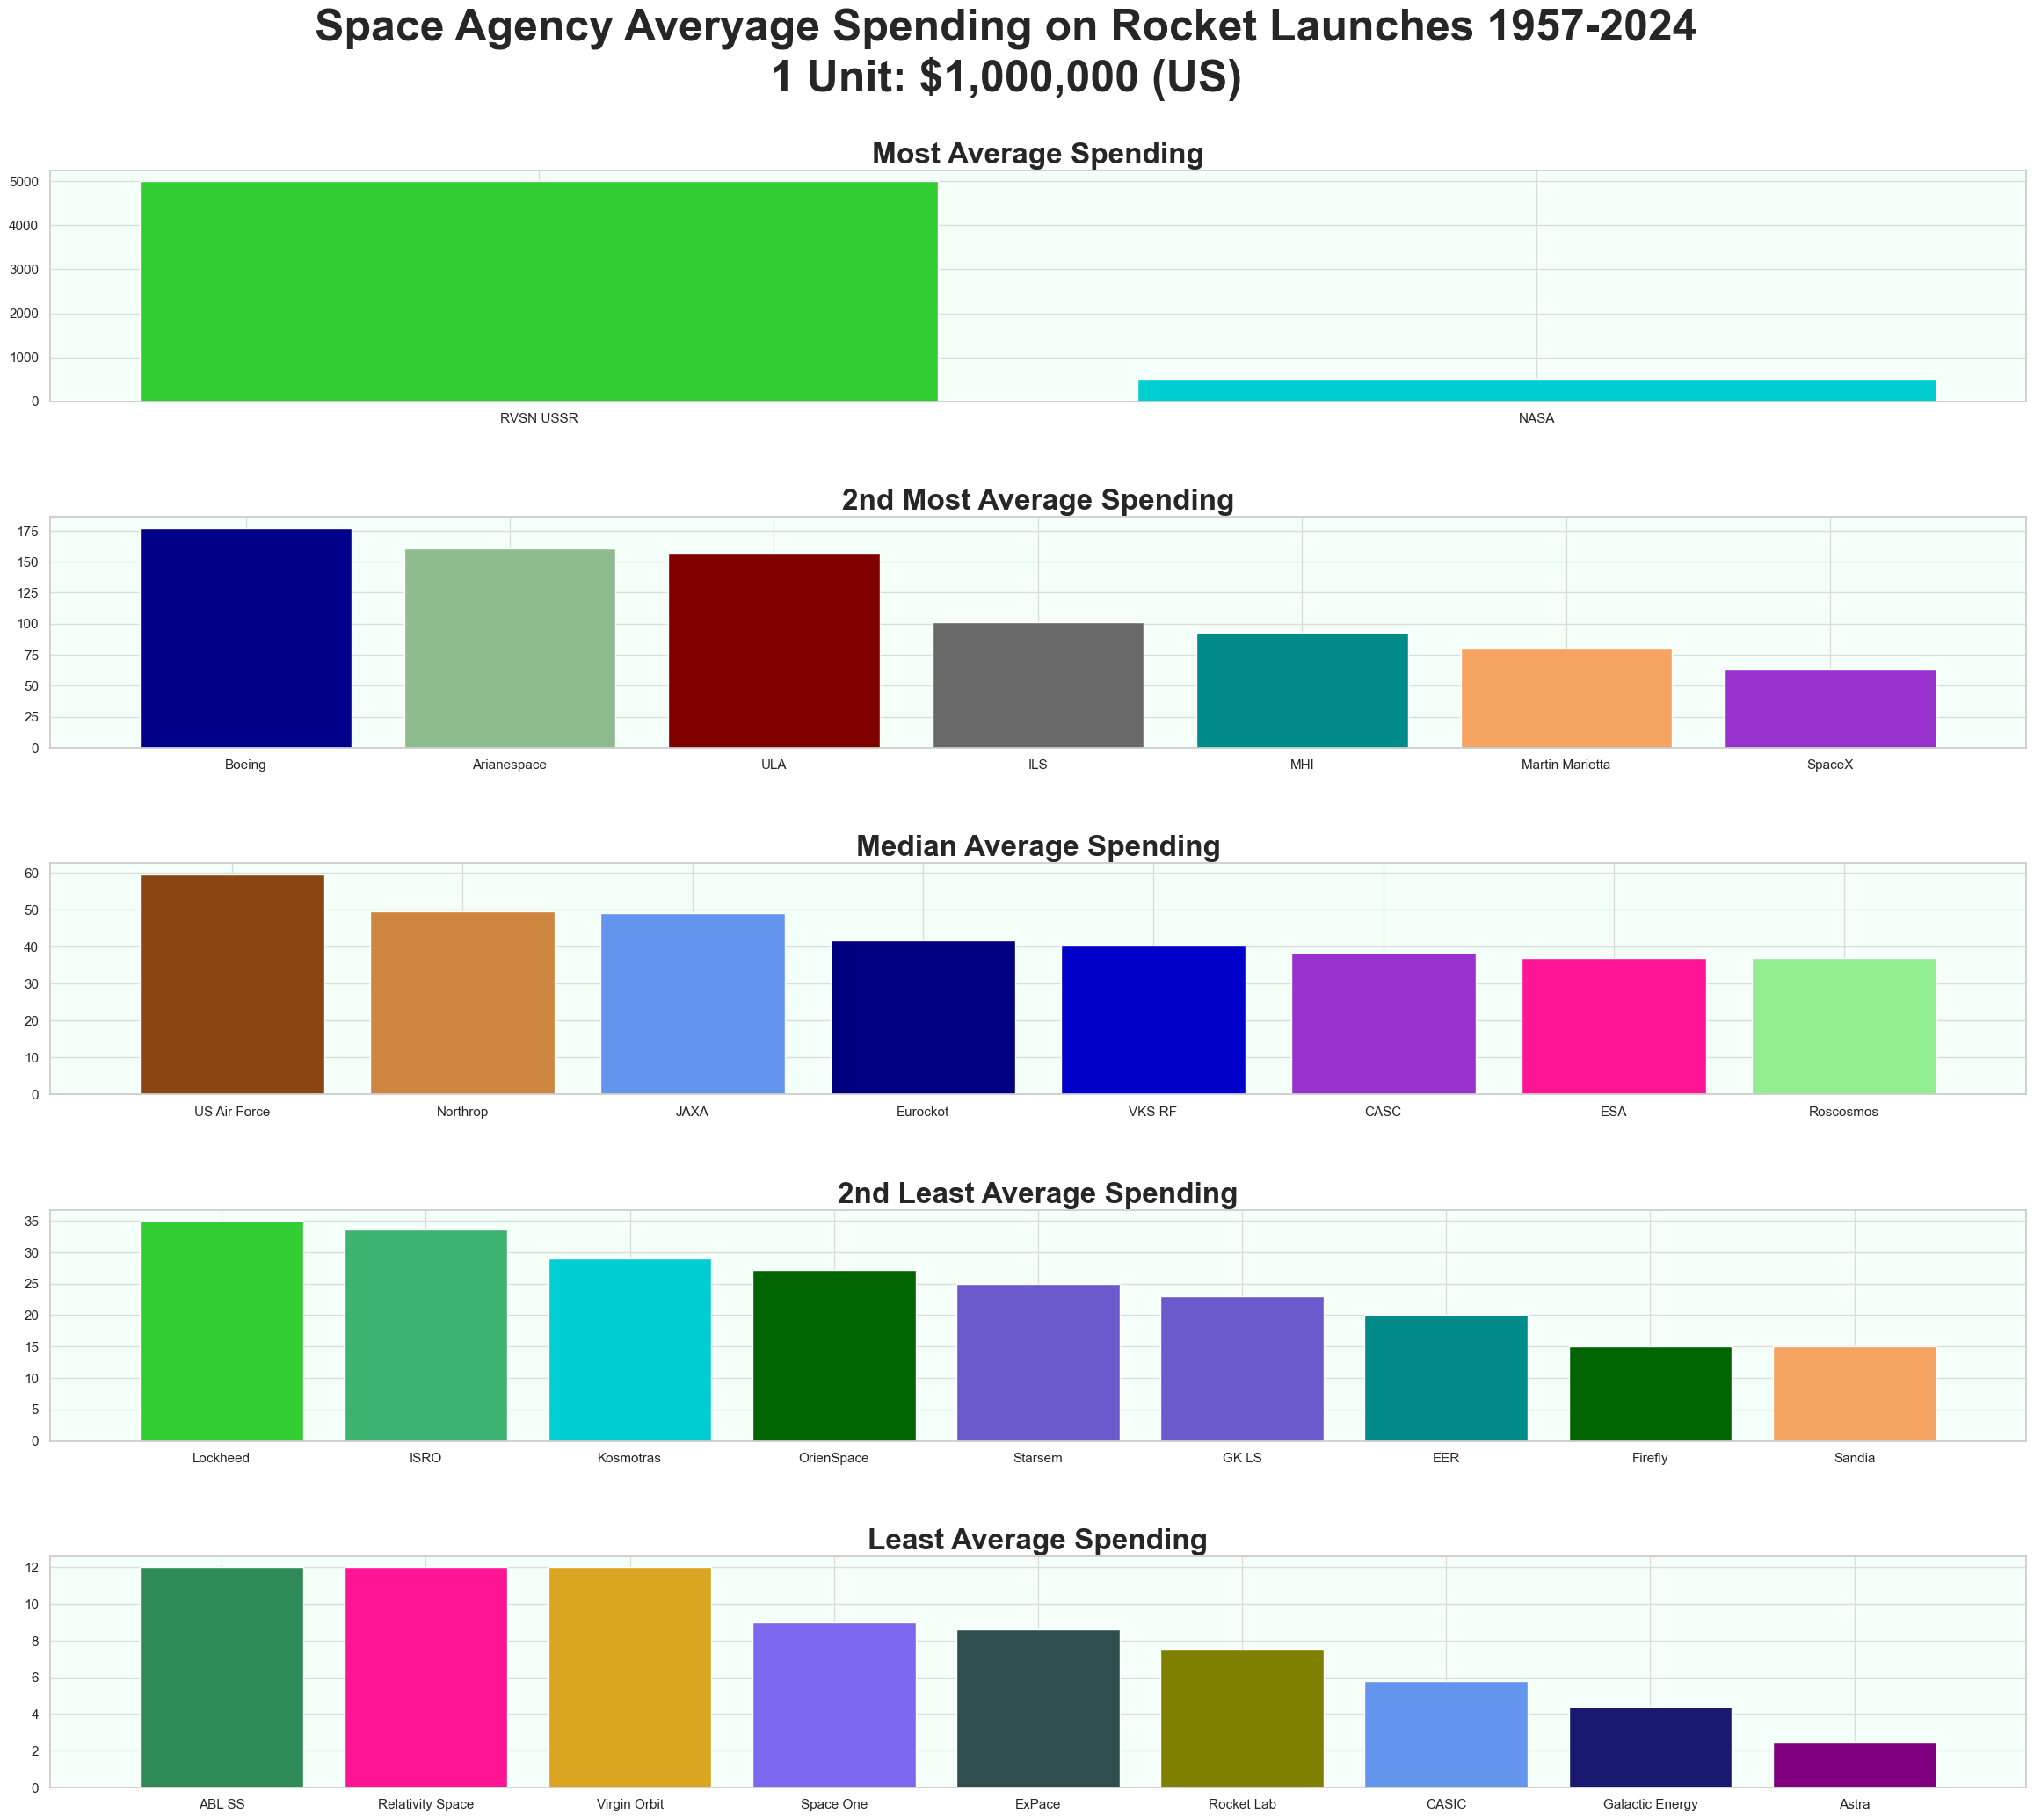

In [102]:
fig, axes = plt.subplots(nrows=len(spending_ranges), figsize=(29, 23))

for (df, title), ax in zip(average_ranges, axes):
    ax.bar(df['Organisation'],
           df['Average_Spending'],
           color=choices(color_list, k=len(df)))
    ax.set_title(title, size=24, weight='bold')

plt.subplots_adjust(
    bottom=0.1,
    top=0.9,
    hspace=0.5,
)

plt.suptitle(t="Space Agency Averyage Spending on Rocket Launches 1957-2024\n1 Unit: $1,000,000 (US)",
             size=36, weight='bold')

plt.rcParams.update({
    'grid.color': 'gainsboro',
    'axes.facecolor': 'mintcream',
})

plt.show()

---
---


## **_Chart the Number of Launches per Year_**


Add 'Year' column.


In [103]:
df_data["Year"] = df_data["Date"].dt.year

In [104]:
df_data.sample()

Organisation                                Location        Country_Name  \
3260    RVSN USSR  Site 32/2, Plesetsk Cosmodrome, Russia  Russian Federation   

     ISO_Code                      Date  \
3260      RUS 1978-10-26 07:00:00+00:00   

                                       Detail  Rocket_Status  Price_US_Mil  \
3260  Tsyklon-3 | Cosmos 1045 & Radio 1 and 2  StatusRetired           NaN   

     Mission_Status  Year  
3260        Success  1978

Re-order columns so date info is together:


In [105]:
df_data.columns

Index(['Organisation', 'Location', 'Country_Name', 'ISO_Code', 'Date',
       'Detail', 'Rocket_Status', 'Price_US_Mil', 'Mission_Status', 'Year'],
      dtype='object')

In [106]:
df_data = df_data[['Organisation',
                   'Location',
                   'Country_Name',
                   'ISO_Code',
                   'Date',
                   'Year',
                   'Detail',
                   'Rocket_Status',
                   'Price_US_Mil',
                   'Mission_Status']]

Verify addition of new columns:


In [107]:
df_data.head()

Organisation                                           Location  \
0       SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
1       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
2         CASC  Site 901 (SLS-1), Jiuquan Satellite Launch Cen...   
3   Rocket Lab     Rocket Lab LC-1B, Mahia Peninsula, New Zealand   
4       SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   

               Country_Name ISO_Code                      Date  Year  \
0  United States of America      USA 2024-04-28 22:08:00+00:00  2024   
1  United States of America      USA 2024-04-28 00:34:00+00:00  2024   
2                     China      CHN 2024-04-25 12:59:00+00:00  2024   
3               New Zealand      NZL 2024-04-23 22:32:00+00:00  2024   
4  United States of America      USA 2024-04-23 22:17:00+00:00  2024   

                                       Detail Rocket_Status  Price_US_Mil  \
0      Falcon 9 Block 5 | Starlink Group 6-54  StatusActive         67.00   
1  Falcon 9 Block 5 | Galileo FOC FM25 & FM27  StatusActive         67.00   
2               Long March 2F/G | Shenzhou 18  StatusActive           NaN   
3     Electron/Curie | Beginning Of The Swarm  StatusActive          7.50   
4      Falcon 9 Block 5 | Starlink Group 6-53  StatusActive         67.00   

  Mission_Status  
0        Success  
1        Success  
2        Success  
3        Success  
4        Success

Create DF which adds and groups years:


In [108]:
df_year = df_data.groupby('Year').size().reset_index(name='Count')

Plot by year:


In [109]:
df_year_min = df_year.Year.min()
df_year_max = df_year.Year.max()

In [110]:
x_ticks = [i for i in range(df_year_min, df_year_max + 1, 5)]

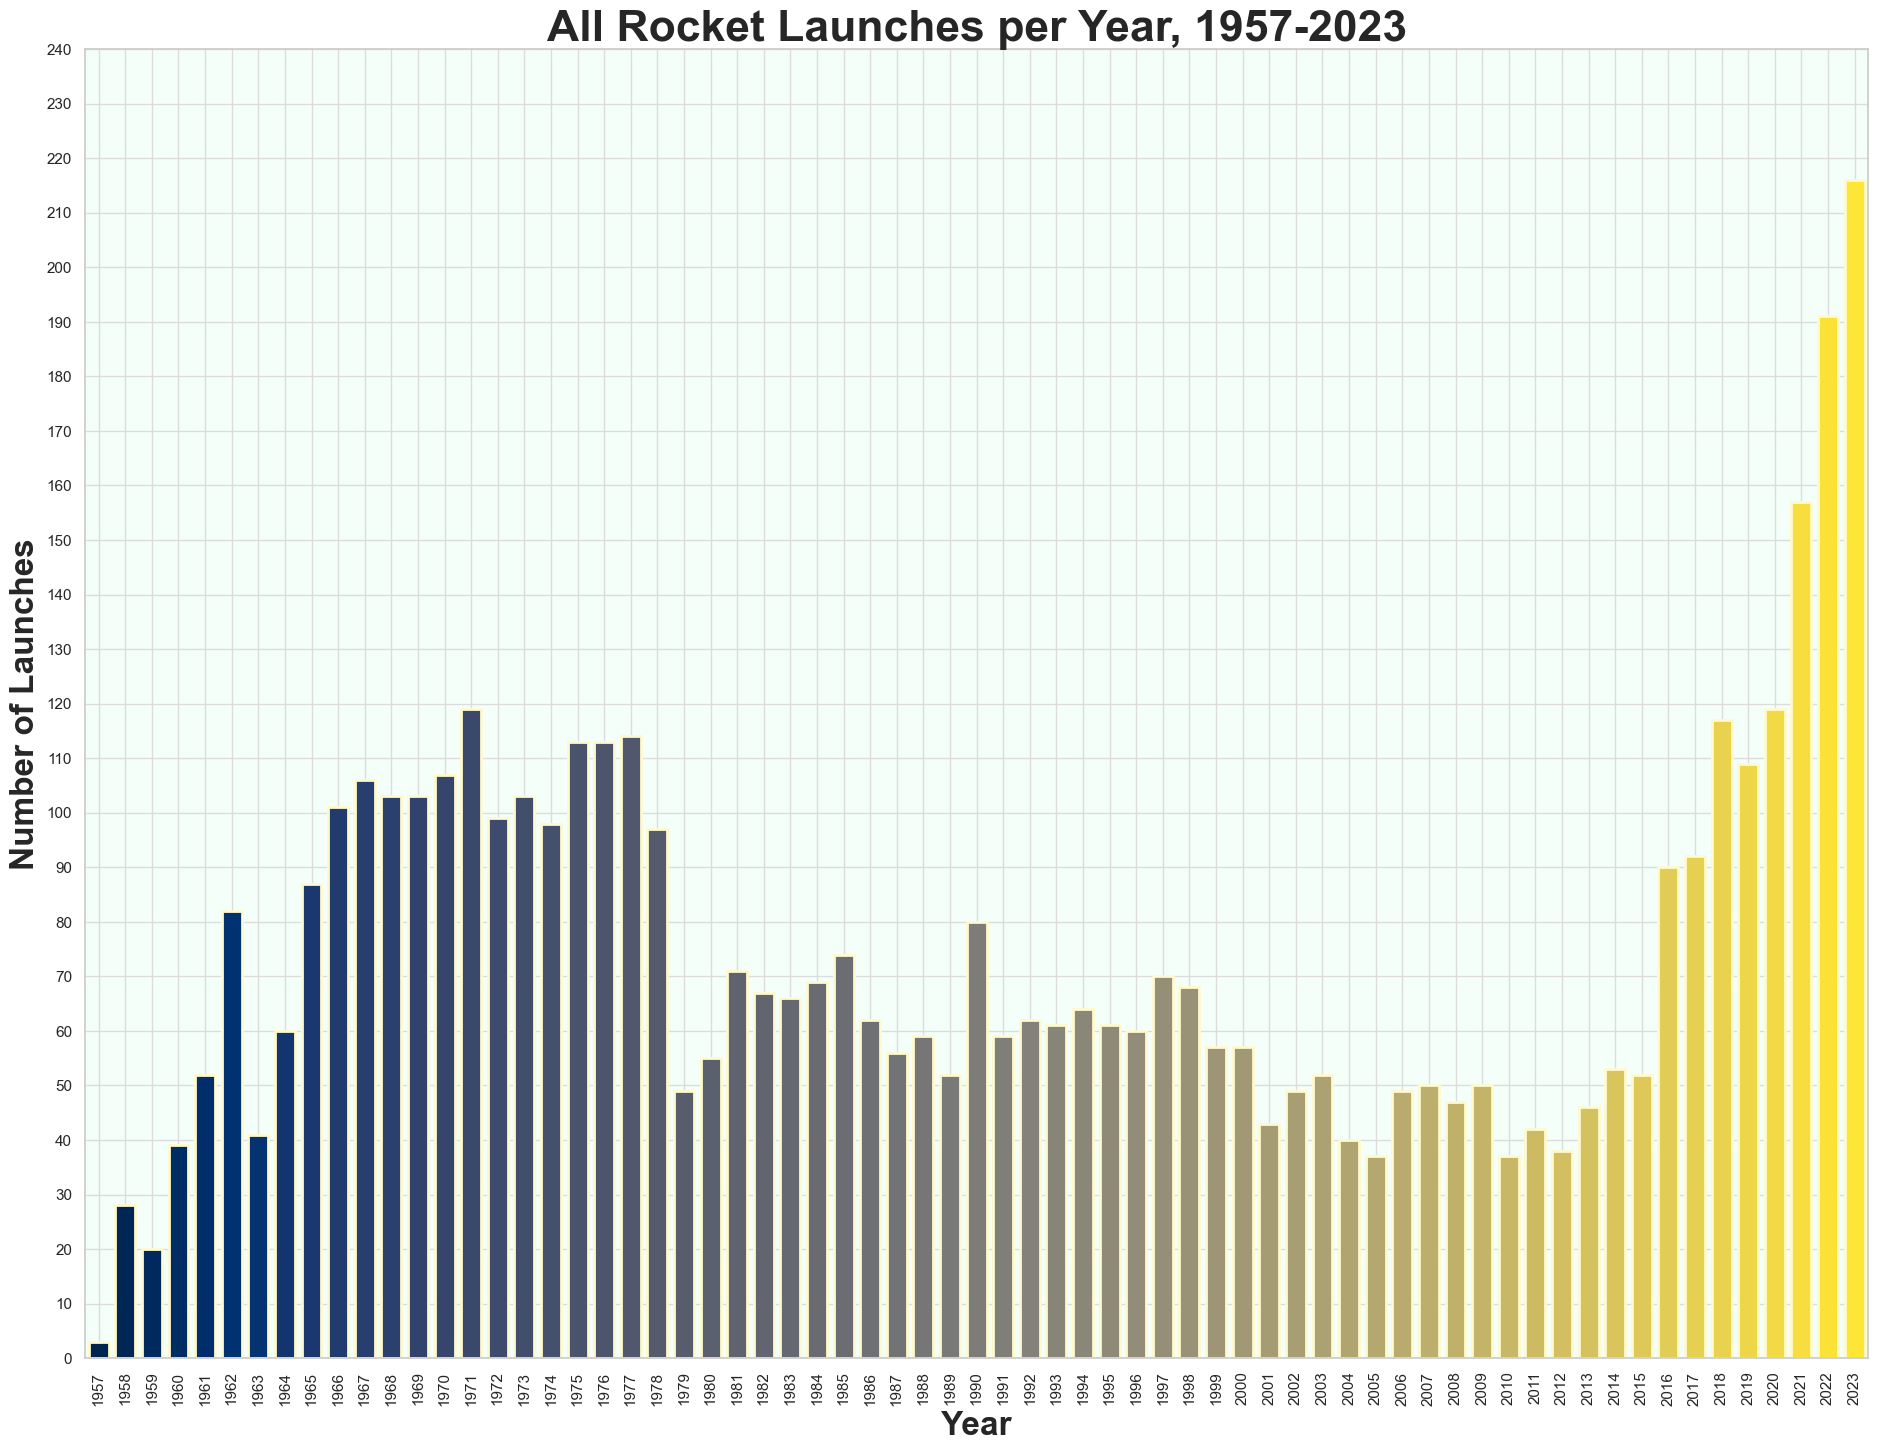

In [111]:
# Remove last year since it's not a complete year's data:
df_year_not_last = df_year.drop(df_year.index[-1])

fig, ax = plt.subplots(figsize=(23, 17))

x_data = df_year_not_last["Year"]
y_data = df_year_not_last["Count"]

# Make bars go snug against x-boundaries:
x_min_limit = df_year_not_last["Year"].min() - .5
x_max_limit = df_year_not_last["Year"].max() + .5

cmap = plt.get_cmap('cividis')
normalize = plt.Normalize(vmin=x_min_limit, vmax=x_max_limit)
colors = [cmap(normalize(value)) for value in x_data]

ax.bar(x_data,
       y_data,
       width=.75,
       color=colors,
       edgecolor='lemonchiffon',
       linewidth=2)


ax.set_xlim([x_min_limit, x_max_limit])

x_min = df_year_not_last["Year"].min()
x_max = df_year_not_last["Year"].max()
x_ticks = [i for i in range(x_min, x_max + 1)]
ax.xaxis.set_ticks(x_ticks)

y_ticks = [i for i in range(0, 250, 10)]
ax.yaxis.set_ticks(y_ticks)

ax.set_xlabel("Year", size=24, weight='bold')
ax.set_ylabel("Number of Launches", size=24, weight='bold')

plt.xticks(rotation=90)
plt.title(f"All Rocket Launches per Year, 1957-2023", size=32, weight='bold')

plt.show()

## **_Chart the Number of Launches Month-on-Month until the Present_**

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.


Create column based on months:


In [112]:
month_year = df_data['Date'].dt.strftime('%Y-%m')

df_data.insert(6, 'Month', month_year)

Add a column which counts number of launches for each month:


In [113]:
month_count = df_data.groupby('Month')['Month'].transform('count')
df_data.insert(7, 'Month_Count', month_count)

Ensure conversion to DT objects and set timezone to UTC:


In [114]:
df_data['Month'] = pd.to_datetime(
    df_data['Month'] + '-01').dt.tz_localize('UTC')

Imports:


In [115]:
# Register converters to avoid warnings:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [116]:
import matplotlib.dates as mdates

years = mdates.YearLocator(base=5)
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

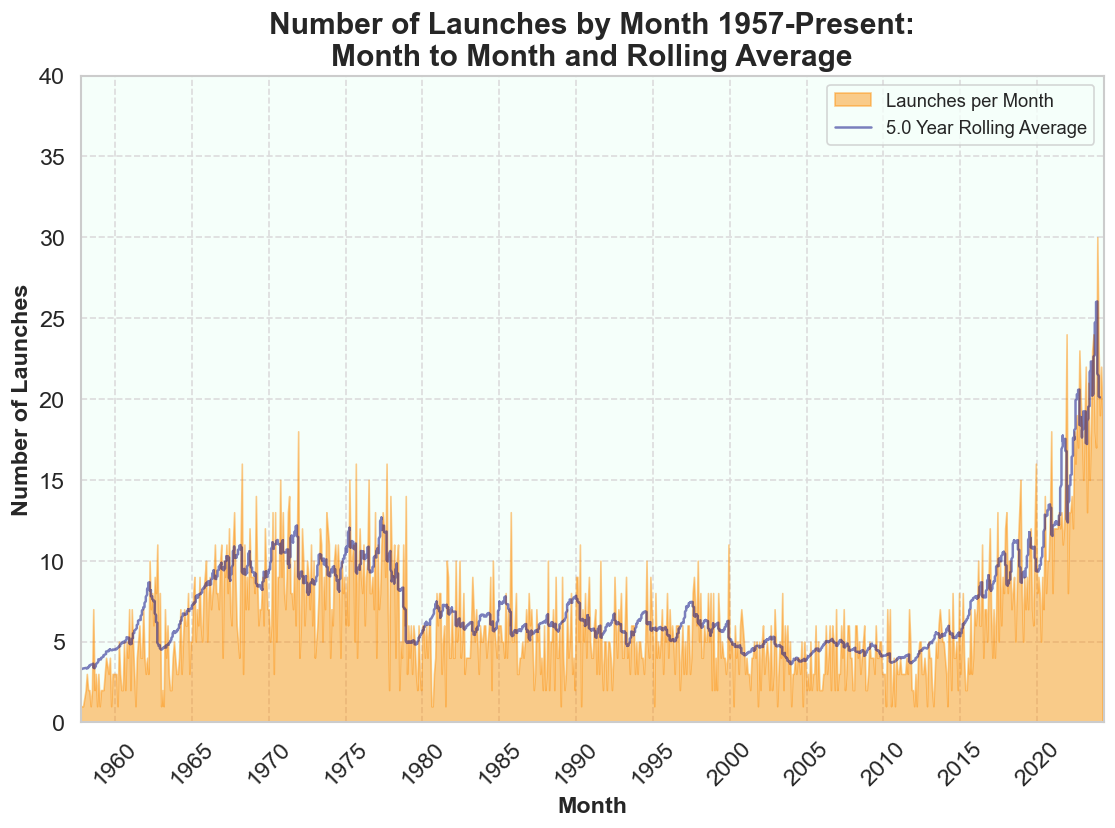

In [117]:
fig, ax = plt.subplots(figsize=(11, 7), dpi=120)

ax.set_title("Number of Launches by Month 1957-Present:\nMonth to Month and Rolling Average",
             fontsize=18, weight='bold')

ax.tick_params(axis='both', labelsize=10)

ax.set_xlabel('Month', fontsize=14, weight='bold')
ax.set_ylabel('Number of Launches', fontsize=14, weight='bold')

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.set_xlim([df_data.Date.min(), df_data.Date.max()])
ax.set_ylim([0, 40])

ax.grid(color='gainsboro', linestyle='--')

ax.fill_between(
    df_data.Month,
    df_data.Month_Count,
    label="Launches per Month",
    color='darkorange',
    alpha=.45,
)

# Get rolling average over 12 months:
rolling_window = 60
rolling_window_year = round(rolling_window / 12, 2)
month_rolling = df_data['Month_Count'].rolling(window=rolling_window).mean()

ax.plot(
    df_data.Month,
    month_rolling,
    label=f"{rolling_window_year} Year Rolling Average",
    color='navy',
    alpha=0.5,
)

plt.grid('off')
plt.legend()
plt.show()

---
---


## **_Launches per Month: Which months are most popular and least popular for launches?_**

Some months have better weather than others. Which time of year seems to be best for space missions?


In [118]:
df_month = df_data.groupby('Month').size().reset_index(name='Count')

Rename 'Month' to differentiate from what we're about to create:


In [119]:
df_data.rename(columns={'Month': 'Month_DT_01'}, inplace=True)

Create column with only Month names:


In [120]:
month_name = df_data['Date'].dt.strftime('%B')

df_data.insert(7, 'Month_Name', month_name)

In [121]:
df_month_name = df_data.groupby('Month_Name').size().reset_index(name='Count')

In [122]:
df_month_name

Month_Name  Count
0       April    441
1      August    433
2    December    540
3    February    380
4     January    322
5        July    397
6        June    448
7       March    422
8         May    371
9    November    401
10    October    444
11  September    427

Plot the data:


In [123]:
# Define variables:
month_names = df_month_name.Month_Name
month_counts = df_month_name.Count

In [124]:
from matplotlib import colormaps

seaborn_palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

all_palettes = list(colormaps) + seaborn_palettes

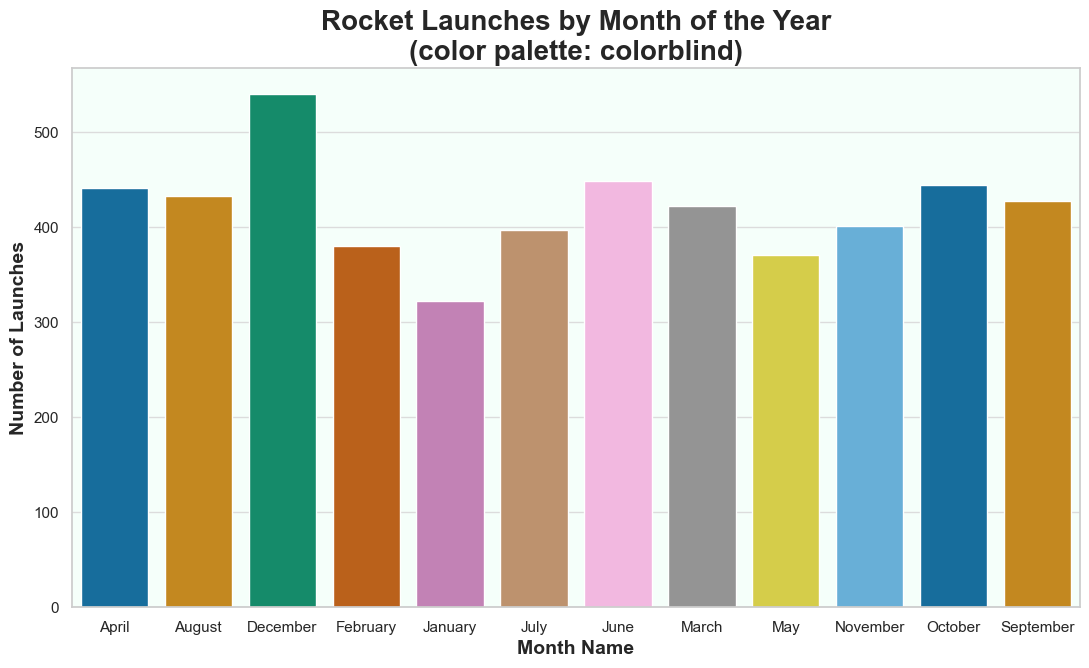

In [125]:
# Initialize MatPlotLib figure
fig, ax = plt.subplots(figsize=(13, 7))

# palette = choice(all_palettes)
# I like Seaborn's palettes for this plot:
palette = choice(seaborn_palettes)

# Plot the months/counts:
sns.barplot(x=month_names, y=month_counts, hue=month_names, palette=palette)

plt.xlabel("Month Name", size=14, weight='bold')
plt.ylabel("Number of Launches", size=14, weight='bold')

plt.title(f"Rocket Launches by Month of the Year\n(color palette: {palette})",
          size=20,
          weight='bold')

plt.show()

#### **_Analysis:_**


December is the most popular, January the least.


---
---


## **_How has the Launch Price varied Over Time?_**

Create a line chart that shows the average price of rocket launches over time.


To keep the plot uncluttered, I'll plot by year.


In [126]:
df_data.sample()

Organisation                                      Location Country_Name  \
320         CASC  LC-3, Xichang Satellite Launch Center, China        China   

    ISO_Code                      Date  Year               Month_DT_01  \
320      CHN 2022-11-27 12:23:00+00:00  2022 2022-11-01 00:00:00+00:00   

    Month_Name  Month_Count                              Detail Rocket_Status  \
320   November           20  Long March 2D | Yaogan 36 Group 03  StatusActive   

     Price_US_Mil Mission_Status  
320         29.75        Success

Create DF with Year and Price:


In [127]:
df_price_year = df_data.filter(['Year', 'Price_US_Mil'], axis=1).sort_values(by='Year')

Drop NaN values:


In [128]:
df_price_year.dropna(inplace=True)

Drop duplicates:


In [129]:
df_price_year.drop_duplicates(inplace=True)

Reset index:


In [130]:
df_price_year.reset_index(inplace=True, drop=True)

Ensure conversion to DT objects and set timezone to UTC:


In [131]:
df_price_year['Year'] = pd.to_datetime(
    df_price_year['Year'].astype(str), format='%Y')

Verify new DF:


Use dates/register imports again:


In [132]:
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
years = mdates.YearLocator(base=5)
years_fmt = mdates.DateFormatter('%Y')

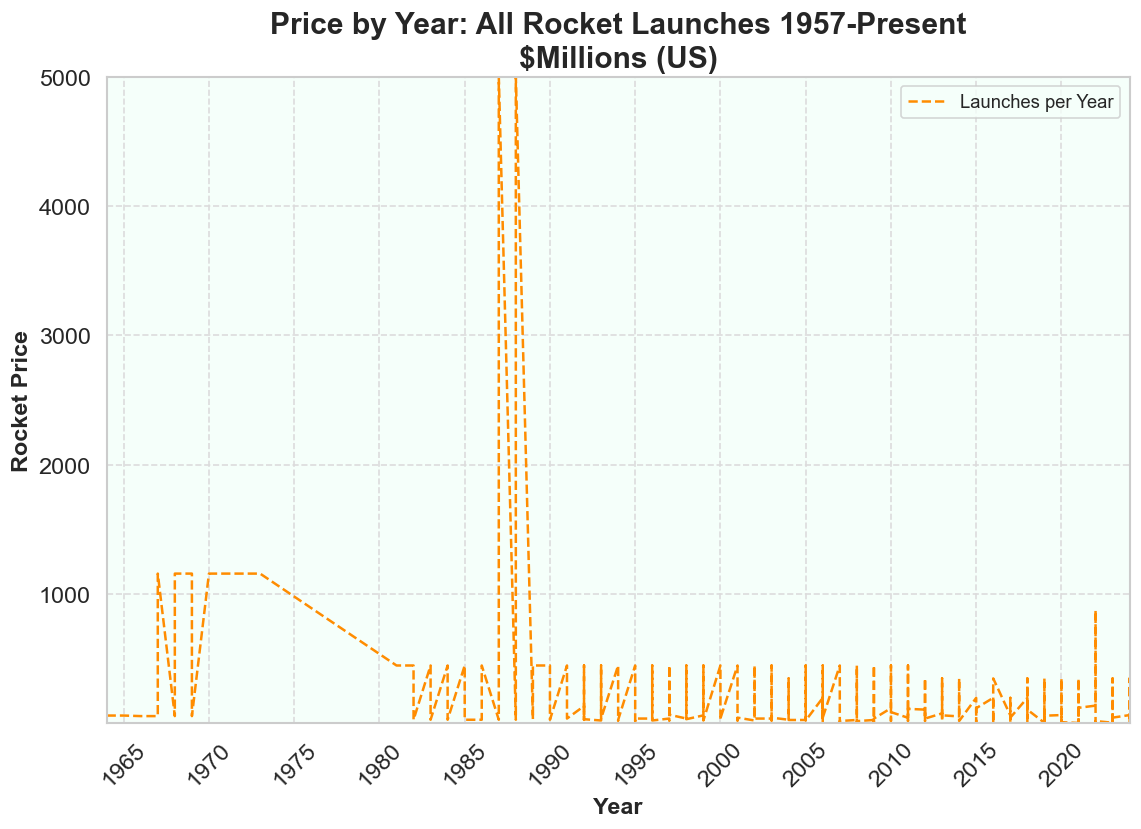

In [133]:
fig, ax = plt.subplots(figsize=(11, 7), dpi=120)

ax.set_title("Price by Year: All Rocket Launches 1957-Present\n$Millions (US)",
             fontsize=18, weight='bold')

ax.tick_params(axis='both', labelsize=10)

ax.set_xlabel('Year', fontsize=14, weight='bold')
ax.set_ylabel('Rocket Price', fontsize=14, weight='bold')

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

ax.set_xlim([df_price_year.Year.min(), df_price_year.Year.max()])
ax.set_ylim([df_price_year.Price_US_Mil.min(),
            df_price_year.Price_US_Mil.max()])

ax.grid(color='gainsboro', linestyle='--')

ax.plot(
    df_price_year.Year,
    df_price_year.Price_US_Mil,
    label="Launches per Year",
    color='darkorange',
    linestyle='dashed',
)

plt.grid('off')
plt.legend()
plt.show()

#### **_Analysis:_**


It looks like the price skyrocketed in the mid-80's.

If I recall that was the time of the most Space Shuttle launches.


---
---


## **_Chart the Number of Launches over Time by the Top 10 Organisations._**

How has the dominance of launches changed over time between the different players?


In [134]:
# Get top 10 organizations in DF as list:
org_names_top_10_list = df_data['Organisation'].value_counts().nlargest(
    10).index

In [135]:
# Filter to include only top 10 orgs:
df_org_top_10 = df_data[(df_data['Organisation'].isin(org_names_top_10_list))]

Custom colors I like for this plot:


In [136]:
colors_10 = ['black', 'darkgrey', 'fuchsia', 'firebrick', 'peru',
             'gold', 'forestgreen', 'lime', 'dodgerblue', 'darkorchid']

linestyles = ['-', '--', '-.', ':']

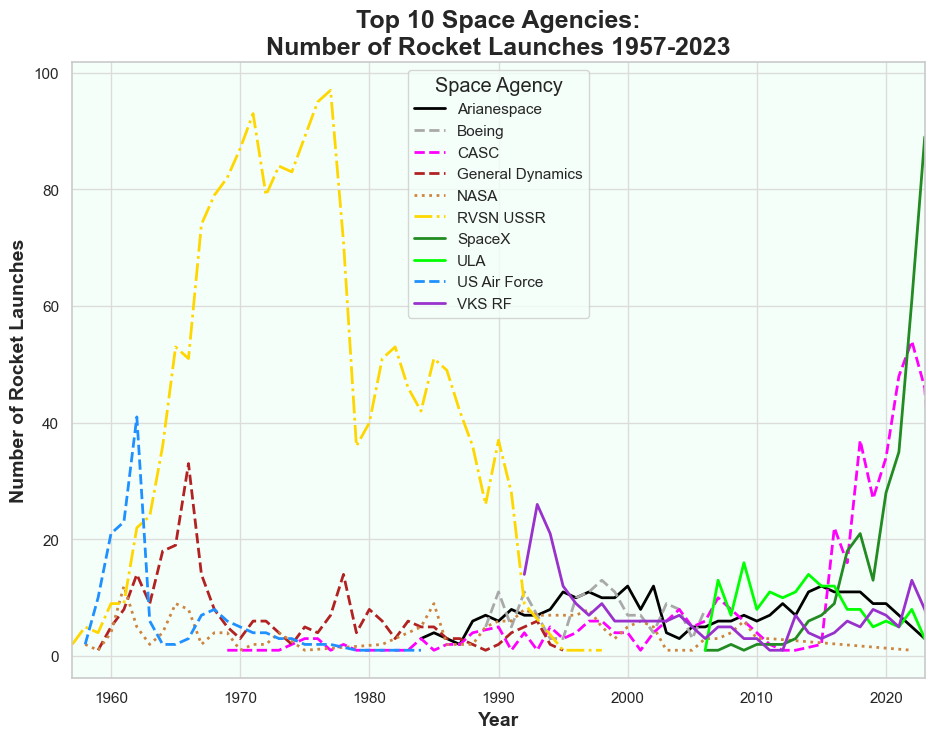

In [137]:
from random import randint

fig, ax = plt.subplots(figsize=(11, 8))

ind = 0

for org, data in df_org_top_10.groupby('Organisation'):
    org_data = data.groupby('Year').size()
    plt.plot(org_data.index,
             org_data.values,
             label=org,
             color=colors_10[ind],
             linewidth=2,
             linestyle=choice(linestyles))
    ind += 1

ax.set_xlim([1957, 2023])

ax.set_title("Top 10 Space Agencies:\nNumber of Rocket Launches 1957-2023",
             fontsize=18,
             weight='bold')
ax.set_xlabel("Year", fontsize=14, weight='bold')
ax.set_ylabel("Number of Rocket Launches", fontsize=14, weight='bold')

ax.legend(title="Space Agency", title_fontsize='large')

plt.show()

---
---


## **_Cold War Space Race: USA vs USSR_**

The cold war lasted from the start of the dataset up until 1991.


Create DF with USA and USSR:


In [138]:
# Check names of countries to wrangle former USSR countries into one group:
df_data.Country_Name.unique()

array(['United States of America', 'China', 'New Zealand',
       'Russian Federation', 'Kazakhstan', 'Japan', 'India',
       'Iran, Islamic Republic of', 'Korea, Republic of',
       "Korea, Democratic People's Republic of", 'France', 'Israel',
       'United Kingdom of Great Britain and Northern Ireland', 'Brazil',
       'Kenya', 'Australia'], dtype=object)

In [139]:
# The two former Soviet republics:
ussr = ['Russian Federation', 'Kazakhstan']
# Create DF combining these two values into `df_ussr`:
df_ussr = df_data[df_data['Country_Name'].isin(ussr)]
# Rename column to USSR:
df_ussr.loc[:, 'Country_Name'] = 'USSR'

In [140]:
# Create DF combining these two values into `df_usa`:
df_usa = df_data[df_data['Country_Name'] == 'United States of America']
# Rename column to USA:
df_usa.loc[:, 'Country_Name'] = 'USA'

#### **_Instead of separate DF's, we can do it all in one:_**


In [141]:
# Alternatively, change country names in original DataFrame:
#  (maybe we can use both this and the individual DataFrames from before)
ussr = ['Russian Federation', 'Kazakhstan']

df_usa_ussr = df_data.copy()

df_usa_ussr.loc[df_usa_ussr['Country_Name'].isin(
    ussr), 'Country_Name'] = 'USSR'

df_usa_ussr.loc[df_usa_ussr['Country_Name'] ==
                'United States of America', 'Country_Name'] = 'USA'

In [142]:
# Now, filter out all the other countries:
df_usa_ussr = df_usa_ussr[df_usa_ussr['Country_Name'].isin(['USA', 'USSR'])]

In [143]:
# Now let's remove all dates after 1991:
df_usa_ussr = df_usa_ussr[df_usa_ussr['Year'] <= 1991]

In [144]:
# And reset the index:
df_usa_ussr.reset_index(inplace=True, drop=True)

---


### **_Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA_**

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.


In [145]:
# Create series w/value_counts:
usa_ussr_counts = df_usa_ussr['Country_Name'].value_counts()

In [146]:
fig = px.pie(names=usa_ussr_counts.index,
             values=usa_ussr_counts,
             labels=usa_ussr_counts.index,
             width=1000,
             height=1000)

title = "USA vs USSR Space Agency Launches:\nCold War Era (1957-1991)"

fig.update_layout(title=dict(text=title,
                             font=dict(size=22),
                             automargin=True,
                             yref='paper'))

fig.update_traces(textposition='inside',
                  textinfo='value+percent+label')

fig.show()

#### **_Analysis:_**


It appears the USSR had a lot more launches during the Cold War.


---


In [147]:
colors_varied = ['black', 'darkgrey', 'fuchsia', 'firebrick', 'peru',
                 'gold', 'forestgreen', 'lime', 'dodgerblue', 'darkorchid',
                 "b", "g", "r", "c", "m", "y", "k", "blueviolet", "brown",
                 "burlywood", "cadetblue", "chartreuse", "chocolate", "coral",
                 "cornflowerblue", "mediumblue", "mediumorchid", "mediumpurple",
                 "mediumseagreen",]

print(sorted(list(set(colors_varied))))

['b', 'black', 'blueviolet', 'brown', 'burlywood', 'c', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'darkgrey', 'darkorchid', 'dodgerblue', 'firebrick', 'forestgreen', 'fuchsia', 'g', 'gold', 'k', 'lime', 'm', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'peru', 'r', 'y']


### **_Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers_**


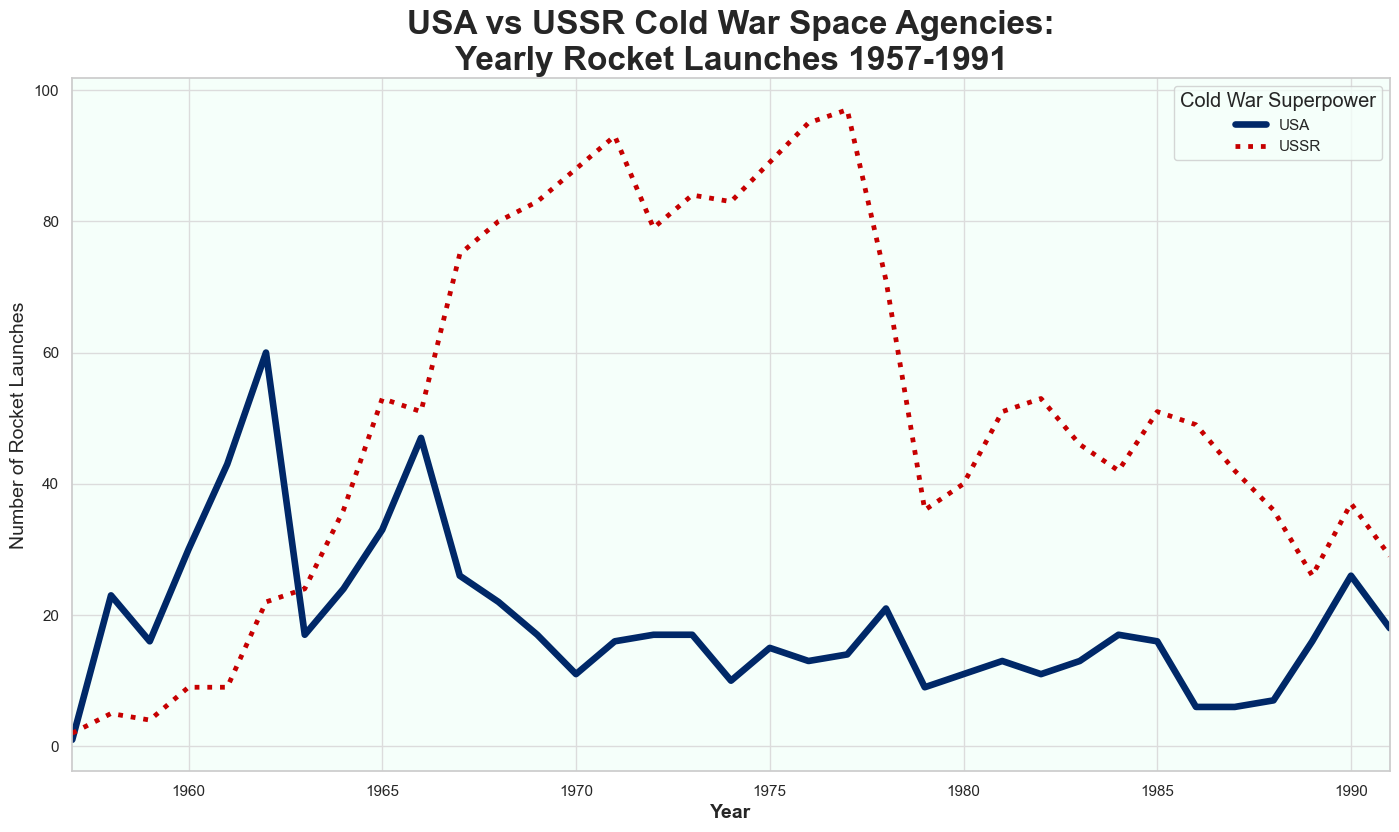

In [148]:
from random import uniform

fig, ax = plt.subplots(figsize=(17, 9))


# Soviet Red, Old Glory Blue:
red_blue = ['#002868', '#c60000']
# Solid and dotted:
matplotlib_linestyles = ['-', ':']
ind = 0

# Vary the linewidths and linestyles randomly:
for country, data in df_usa_ussr.groupby('Country_Name'):
    country_data = data.groupby('Year').size()
    plt.plot(country_data.index,
             country_data.values,
             label=country,
             linewidth=round(uniform(3, 6), 2),  # For variation
             linestyle=matplotlib_linestyles[ind],
             color=red_blue[ind])
    ind += 1

ax.set_xlim([1957, 1991])

ax.set_title("USA vs USSR Cold War Space Agencies:\nYearly Rocket Launches 1957-1991",
             fontsize=24,
             weight='bold')

ax.set_xlabel("Year", fontsize=14, weight='bold')
ax.set_ylabel("Number of Rocket Launches", fontsize=14, weight=14)

ax.legend(title="Cold War Superpower", title_fontsize='large')

plt.show()

#### **_Analysis:_**


Looks like the Soviets had a lot more launchesafter the early 60's, the US had a lot more until that point.


---


### **_Chart the Total Number of Mission Failures Year on Year._**


In [149]:
df_usa_ussr.Mission_Status.unique()

array(['Success', 'Failure', 'Partial Failure', 'Prelaunch Failure'],
      dtype=object)

In [150]:
failure_types = ['Success', 'Failure', 'Partial Failure', 'Prelaunch Failure']

df_cold_war_failure = df_usa_ussr[df_usa_ussr['Mission_Status'].isin(
    failure_types)]

Modify the previous plot to show Mission Failures:


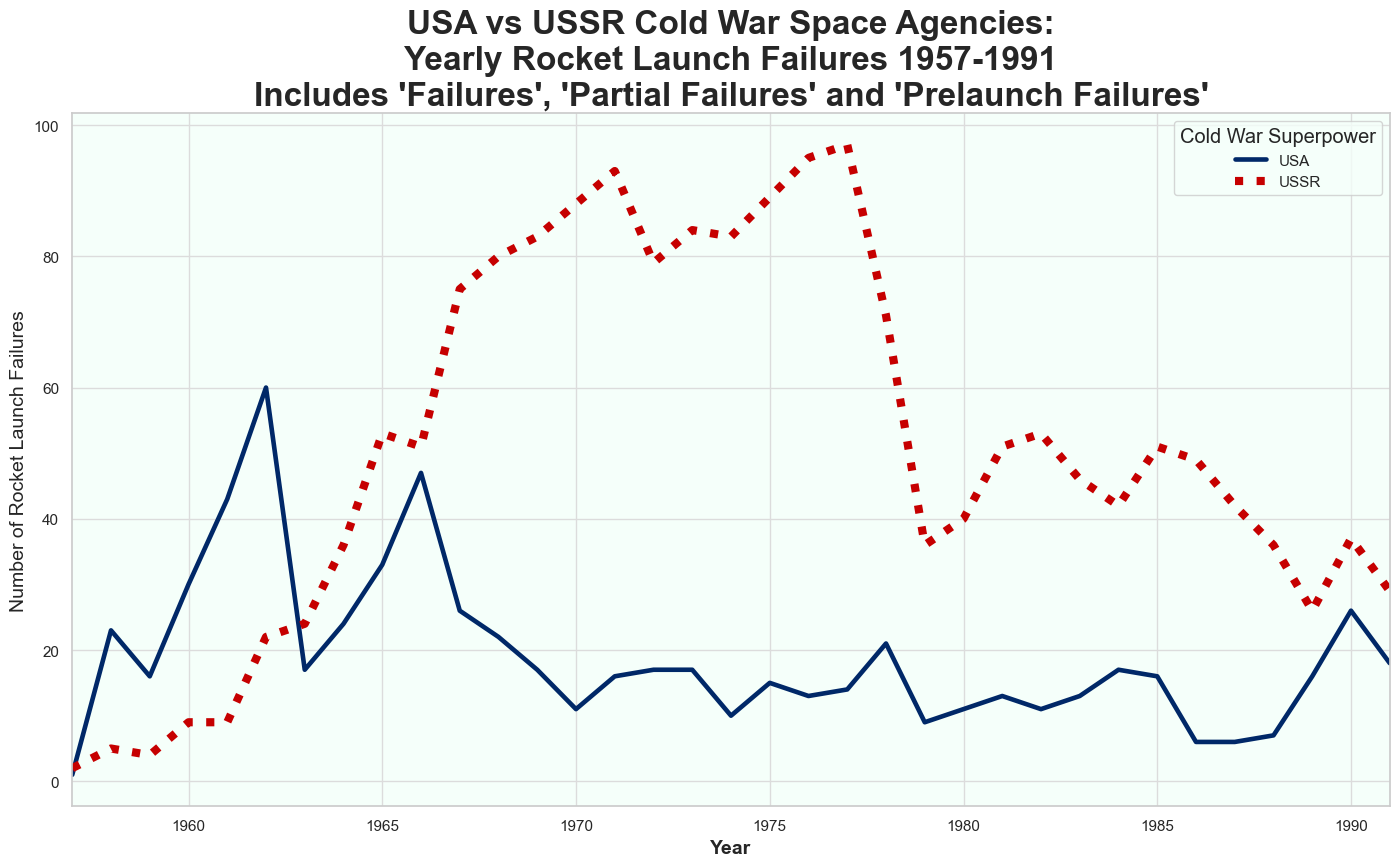

In [151]:
from random import uniform

fig, ax = plt.subplots(figsize=(17, 9))


# Soviet Red, Old Glory Blue:
red_blue = ['#002868', '#c60000']
# Solid and dotted:
matplotlib_linestyles = ['-', ':']
ind = 0

for country, data in df_cold_war_failure.groupby('Country_Name'):
    country_data = data.groupby('Year').size()
    plt.plot(country_data.index,
             country_data.values,
             label=country,
             linewidth=round(uniform(3, 6), 2),
             linestyle=matplotlib_linestyles[ind],
             color=red_blue[ind])
    ind += 1

ax.set_xlim([1957, 1991])

title = "USA vs USSR Cold War Space Agencies:\nYearly Rocket Launch Failures 1957-1991\nIncludes 'Failures', 'Partial Failures' and 'Prelaunch Failures'"

ax.set_title(title,
             fontsize=24,
             weight='bold')

ax.set_xlabel("Year", fontsize=14, weight='bold')
ax.set_ylabel("Number of Rocket Launch Failures", fontsize=14, weight=14)

ax.legend(title="Cold War Superpower", title_fontsize='large')

plt.show()

#### **_Analysis:_**


From the plot, it looks like the US had more failures early on, then things evened out.

It appears the USSR was better than the US at first, then by the late 60's had a dramatic increase in Mission Failures, then things evened out by the late 70's.

From the late 70's through 1991, the US and USSR both had more consistent success, but the US still had about half to one-third as many failures.


---


### **_Chart the Percentage of Failures over Time_**

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?


Create a DF which counts the number of total missions per year:


In [152]:
df_cold_missions = df_usa_ussr.groupby(
    ['Country_Name', 'Year']).size().reset_index(name='Total_Missions')

Create another DF which counts the successes per year for each country:


In [153]:
df_cold_successes = df_usa_ussr[df_usa_ussr['Mission_Status'] == 'Success'].groupby(
    ['Country_Name', 'Year']).size().reset_index(name='Success_Count')

Merge the total missions and successes DataFrames:


In [154]:
df_cold_merged = df_cold_missions.merge(
    df_cold_successes, on=['Country_Name', 'Year'], how='left')

Ensure years without successes have `0` instead of `NaN`:


In [155]:
df_cold_merged['Success_Count'] = df_cold_merged['Success_Count'].fillna(0)

Now add a column for success percentage:


In [156]:
success_ratio = (df_cold_merged.Success_Count / df_cold_merged.Total_Missions)

df_cold_merged['Success_Percentage'] = success_ratio * 100

Sort by year for clarity of chronology in viewing DF:


In [157]:
df_cold_merged.sort_values(by=['Year'], inplace=True)

Check the DF:


In [158]:
df_cold_merged

Country_Name  Year  Total_Missions  Success_Count  Success_Percentage
0           USA  1957               1           0.00                0.00
35         USSR  1957               2           2.00              100.00
1           USA  1958              23           5.00               21.74
36         USSR  1958               5           1.00               20.00
2           USA  1959              16           6.00               37.50
..          ...   ...             ...            ...                 ...
32          USA  1989              16          16.00              100.00
68         USSR  1990              37          35.00               94.59
33          USA  1990              26          25.00               96.15
34          USA  1991              18          16.00               88.89
69         USSR  1991              29          27.00               93.10

[70 rows x 5 columns]

Plot percentage:


I first tried plotting everything on one axis, but that obscured the different y-axis scales:


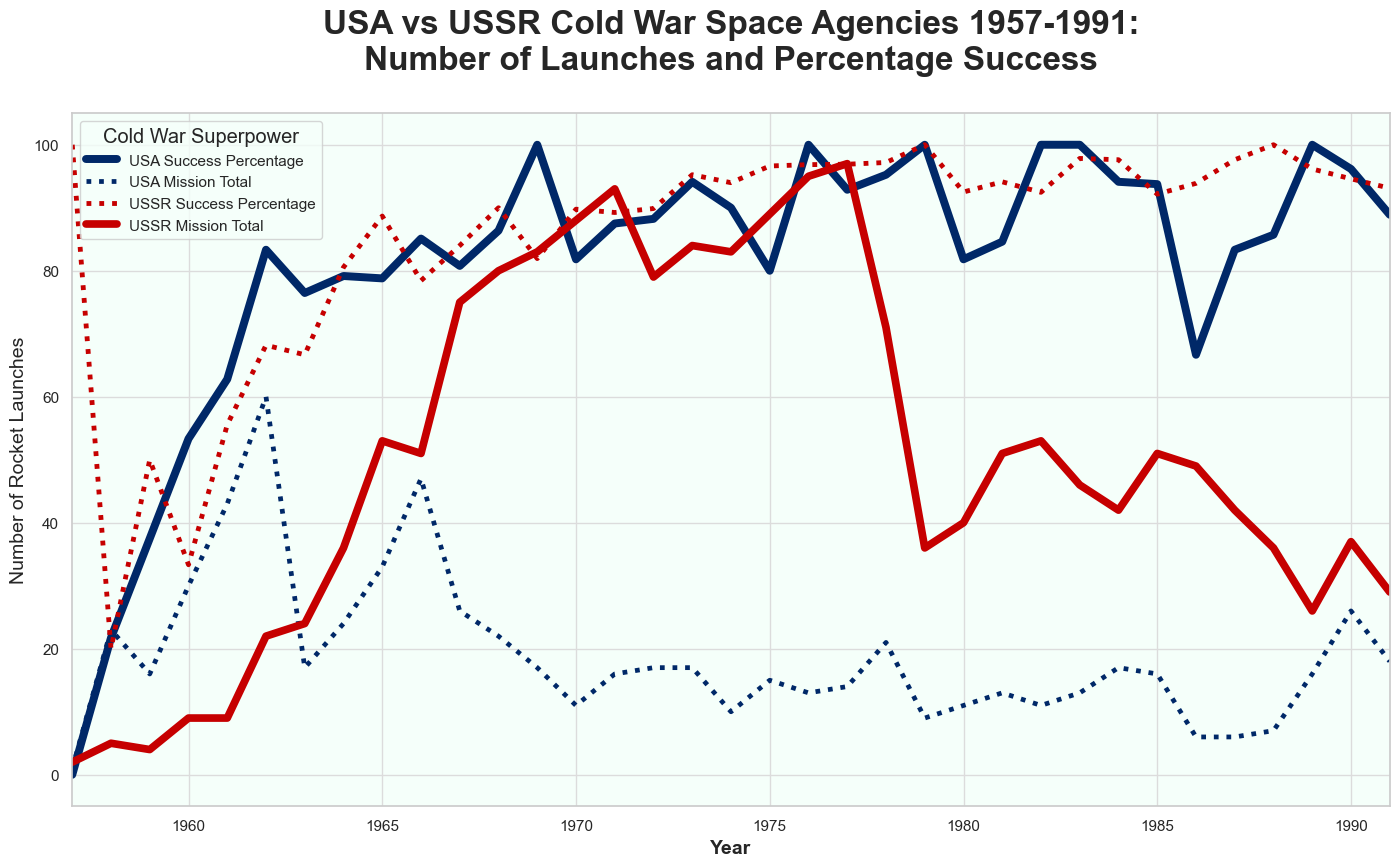

In [159]:
from random import uniform

fig, ax = plt.subplots(figsize=(17, 9))

red_blue = ['#002868', '#c60000']
matplotlib_linestyles = ['-', ':', '-', ':']
color_ind = 0
line_ind = 0

for country, data in df_cold_merged.groupby('Country_Name'):
    plt.plot(data.Year,
             data.Success_Percentage,
             label=f"{country} Success Percentage",
             linewidth=round(uniform(3, 6), 2),
             linestyle=matplotlib_linestyles[line_ind],
             color=red_blue[color_ind])
    line_ind += 1
    plt.plot(data.Year,
             data.Total_Missions,
             label=f"{country} Mission Total",
             linewidth=round(uniform(3, 6), 2),
             linestyle=matplotlib_linestyles[line_ind],
             color=red_blue[color_ind])
    color_ind += 1

ax.set_xlim([1957, 1991])

title = "USA vs USSR Cold War Space Agencies 1957-1991:\nNumber of Launches and Percentage Success\n"

ax.set_title(title,
             fontsize=24,
             weight='bold')

ax.set_xlabel("Year", fontsize=14, weight='bold')
ax.set_ylabel("Number of Rocket Launches", fontsize=14, weight=14)

ax.legend(title="Cold War Superpower", title_fontsize='large')

plt.show()

So I decided on a dual-axis, one for Number of Missions, one for Percentage Success:


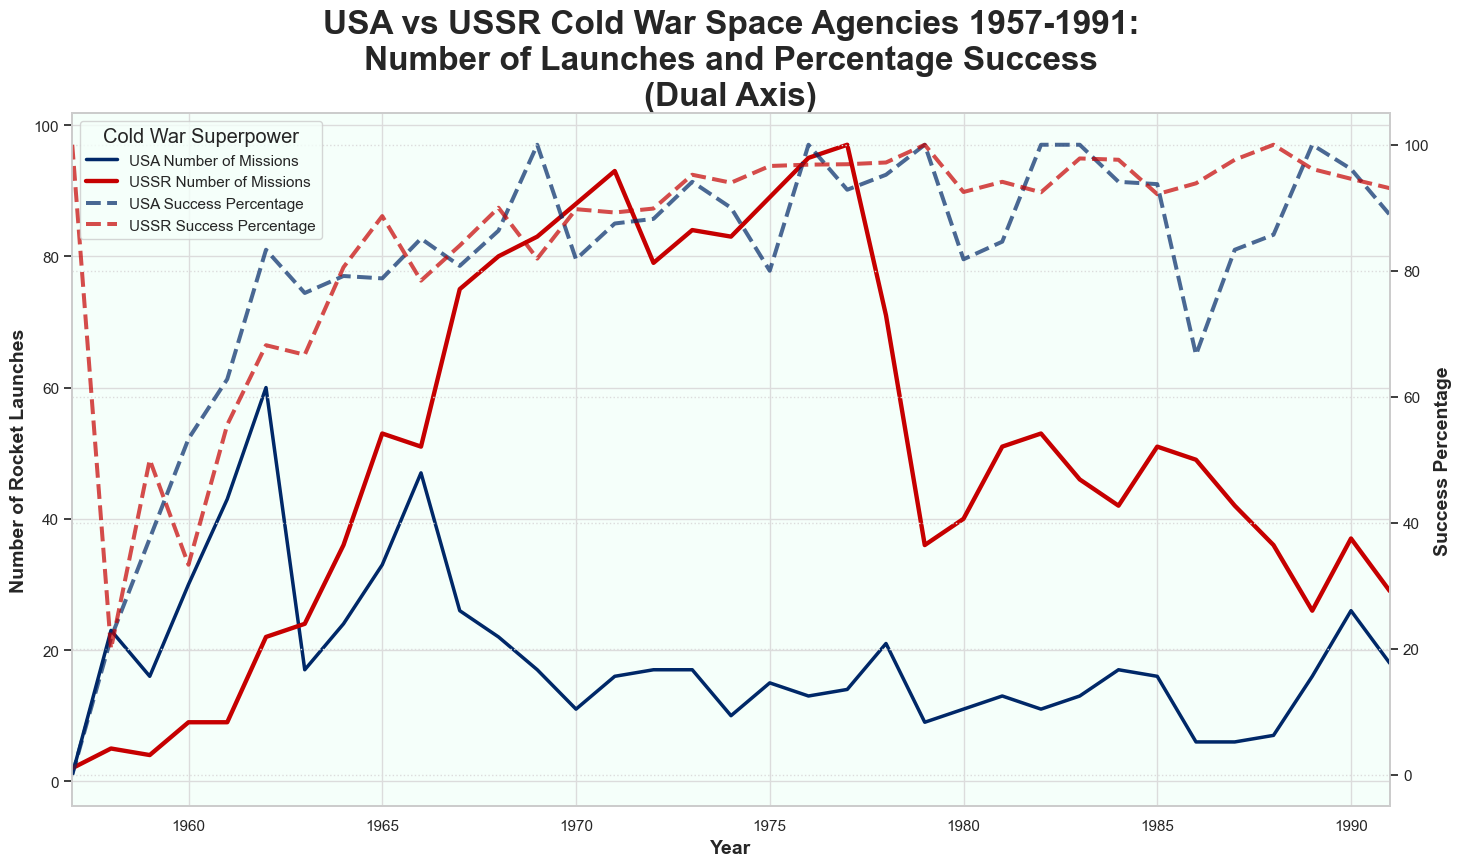

In [180]:
from random import uniform

fig, ax1 = plt.subplots(figsize=(17, 9))
ax2 = ax1.twinx()

red_blue = ['#002868', '#c60000']
dashed = ['--', ':']
color_ind = 0


for country, data in df_cold_merged.groupby('Country_Name'):
    ax1.plot(data.Year,
             data.Total_Missions,
             label=f"{country} Number of Missions",
             linewidth=round(uniform(2, 5), 2),
             linestyle='-',
             color=red_blue[color_ind])
    ax2.plot(data.Year,
             data.Success_Percentage,
             label=f"{country} Success Percentage",
             linewidth=round(uniform(2, 4), 2),
             linestyle=choice(dashed),
             color=red_blue[color_ind], alpha=.7)
    color_ind += 1

ax1.set_xlim([1957, 1991])

title = "USA vs USSR Cold War Space Agencies 1957-1991:"
title += "\nNumber of Launches and Percentage Success"
title += "\n(Dual Axis)"

# ax1_color = 'gainsboro'
ax1.set_title(title, fontsize=24, weight='bold')

ax1.set_xlabel("Year", fontsize=14, weight='bold')
ax1.set_ylabel(
    "Number of Rocket Launches",
    fontsize=14,
    weight='bold',
    # color=ax1_color,
)
# ax1.grid(color=ax1_color, linestyle='-')
ax1.grid(linestyle='-')

# ax2_color = 'grey'
ax2.set_ylabel(
    "Success Percentage",
    fontsize=14,
    weight='bold',
    # color=ax2_color,
)
# ax2.grid(color=ax2_color, linestyle=':')
ax2.grid(linestyle=':')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2,
           labels + labels2,
           title="Cold War Superpower",
           title_fontsize='large')

# Alternatively, make legends separately:
# ax1.legend(title="Number of Missions", title_fontsize='large', loc='upper left')
# ax2.legend(title="Success Percentage", title_fontsize='large', loc='upper right')

plt.show()

#### **_Analysis:_**


USA had more launches in the early 1960's.

USSR had a lot more launches in the 1970's.

Both nations had steady launch amounts in the 1980's, with USSR averaging about 40 a year and the USA under 20 during this time.

The success rates were poor in the beginning for both nations.

Then the US and USSR maintained about 80-90% success rates subsequently, although the USA had a few noticable dips in the succes rate throughout the time while maintaining this average.

USSR had a steep decline in launch number in the late 1970's and never achieved the same level of launches after that. I cannot say whether that's a good or bad thing for them -- perhaps fewer launches means more focused, competent projects?

A very descriptive plot, all in all!


---
---


## **_For Every Year Show which Country was in the Lead in terms of Total Number of Launches (up to and including including 2020)_**

Do the results change if we only look at the number of successful launches?


Create DataFrame which groups entries by Country/Year size for years before and including 2020:


In [161]:
# Assert two columns in `.groupby()` params to for granular control of aggregated data:
df_country_year = df_data.groupby(
    ['Country_Name', 'Year']).size().reset_index(name='Yearly_Launches')

Order the DF by year for clarity in chronology:


In [162]:
df_country_year.sort_values(by=['Year'], inplace=True)

In [163]:
df_country_year = df_country_year[df_country_year['Year'] <= 2020]

Get the indices with the max number of entries for each year w/equation which asserts the `.transform()` method:


In [164]:
ind_eq1 = df_country_year.groupby('Year')['Yearly_Launches'].transform('max')
ind_eq2 = df_country_year['Yearly_Launches']

indices = ind_eq1 == ind_eq2

Use the indices to filter the DF to get country names:


In [165]:
df_country_year_max = df_country_year[indices]

Reset the index for clarity and consistency, `drop=True` to not create new index column:


In [166]:
df_country_year_max.reset_index(inplace=True, drop=True)

View the results:


In [167]:
df_country_year_max

Country_Name  Year  Yearly_Launches
0                 Kazakhstan  1957                2
1   United States of America  1958               23
2   United States of America  1959               16
3   United States of America  1960               30
4   United States of America  1961               43
..                       ...   ...              ...
60  United States of America  2016               27
61  United States of America  2017               30
62                     China  2018               39
63                     China  2019               34
64  United States of America  2020               42

[65 rows x 3 columns]

In [168]:
color_list = ['black', 'blue', 'brown', 'chocolate', 'cornflowerblue', 'crimson',
              'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgreen', 'darkkhaki',
              'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred',
              'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray',
              'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'dimgray',
              'dodgerblue', 'firebrick', 'forestgreen', 'goldenrod', 'green', 'greenyellow', 'indigo', 'lightgreen', 'limegreen', 'maroon', 'mediumblue',
              'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'midnightblue',
              'navy', 'olive', 'olivedrab', 'palegreen', 'peru', 'purple', 'rebeccapurple', 'rosybrown', 'royalblue', 'saddlebrown', 'sandybrown',
              'seagreen', 'sienna', 'slateblue', 'springgreen', 'steelblue', 'yellowgreen']

bar_colors = choices(color_list, k=len(df_country_year_max.Year))

Concatenate Country_Name and Year for the label:


In [169]:
zip_year_country = zip(df_country_year_max.Year,
                       df_country_year_max.Country_Name,
                       df_country_year_max.Yearly_Launches)

labels_year_country = [
    f"{year}: {country} ({num})" for country, year, num in zip_year_country
]

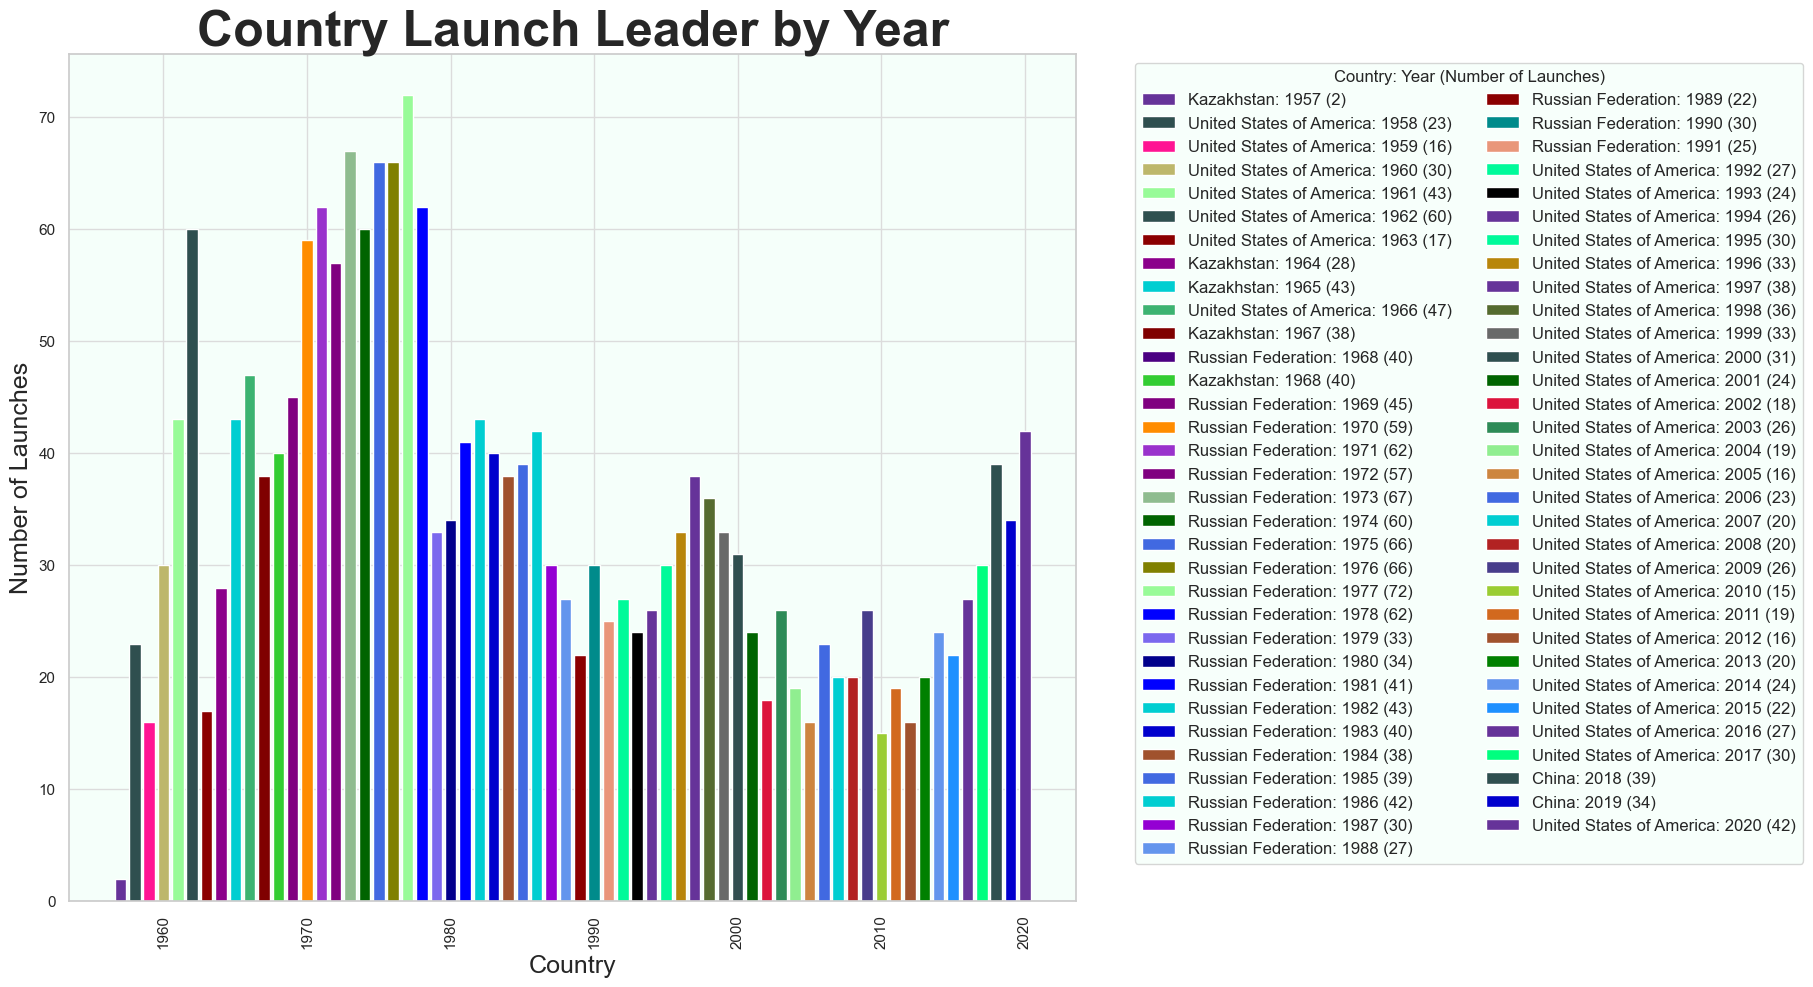

In [170]:
fig, ax = plt.subplots(figsize=(13, 11))

ax.bar(x=df_country_year_max.Year,
       height=df_country_year_max.Yearly_Launches,
       label=labels_year_country,
       color=bar_colors)

ax.set_title("Country Launch Leader by Year", fontsize=36, weight='bold')
ax.set_xlabel("Country", fontsize=18)
ax.set_ylabel("Number of Launches", fontsize=18)

plt.legend(ncol=2,
           title="Country: Year (Number of Launches)",
           fontsize='medium',
           bbox_to_anchor=(1.05, 1))

plt.xticks(rotation=90)

plt.show()

To answer the question:

_Do the results change if we only look at the number of successful launches?_

Let's now create a DF for Country Launcher Leader by Year for successful launches only.

Repeat the exact same process as above but filtering the DF by column: Mission_Status: Success...


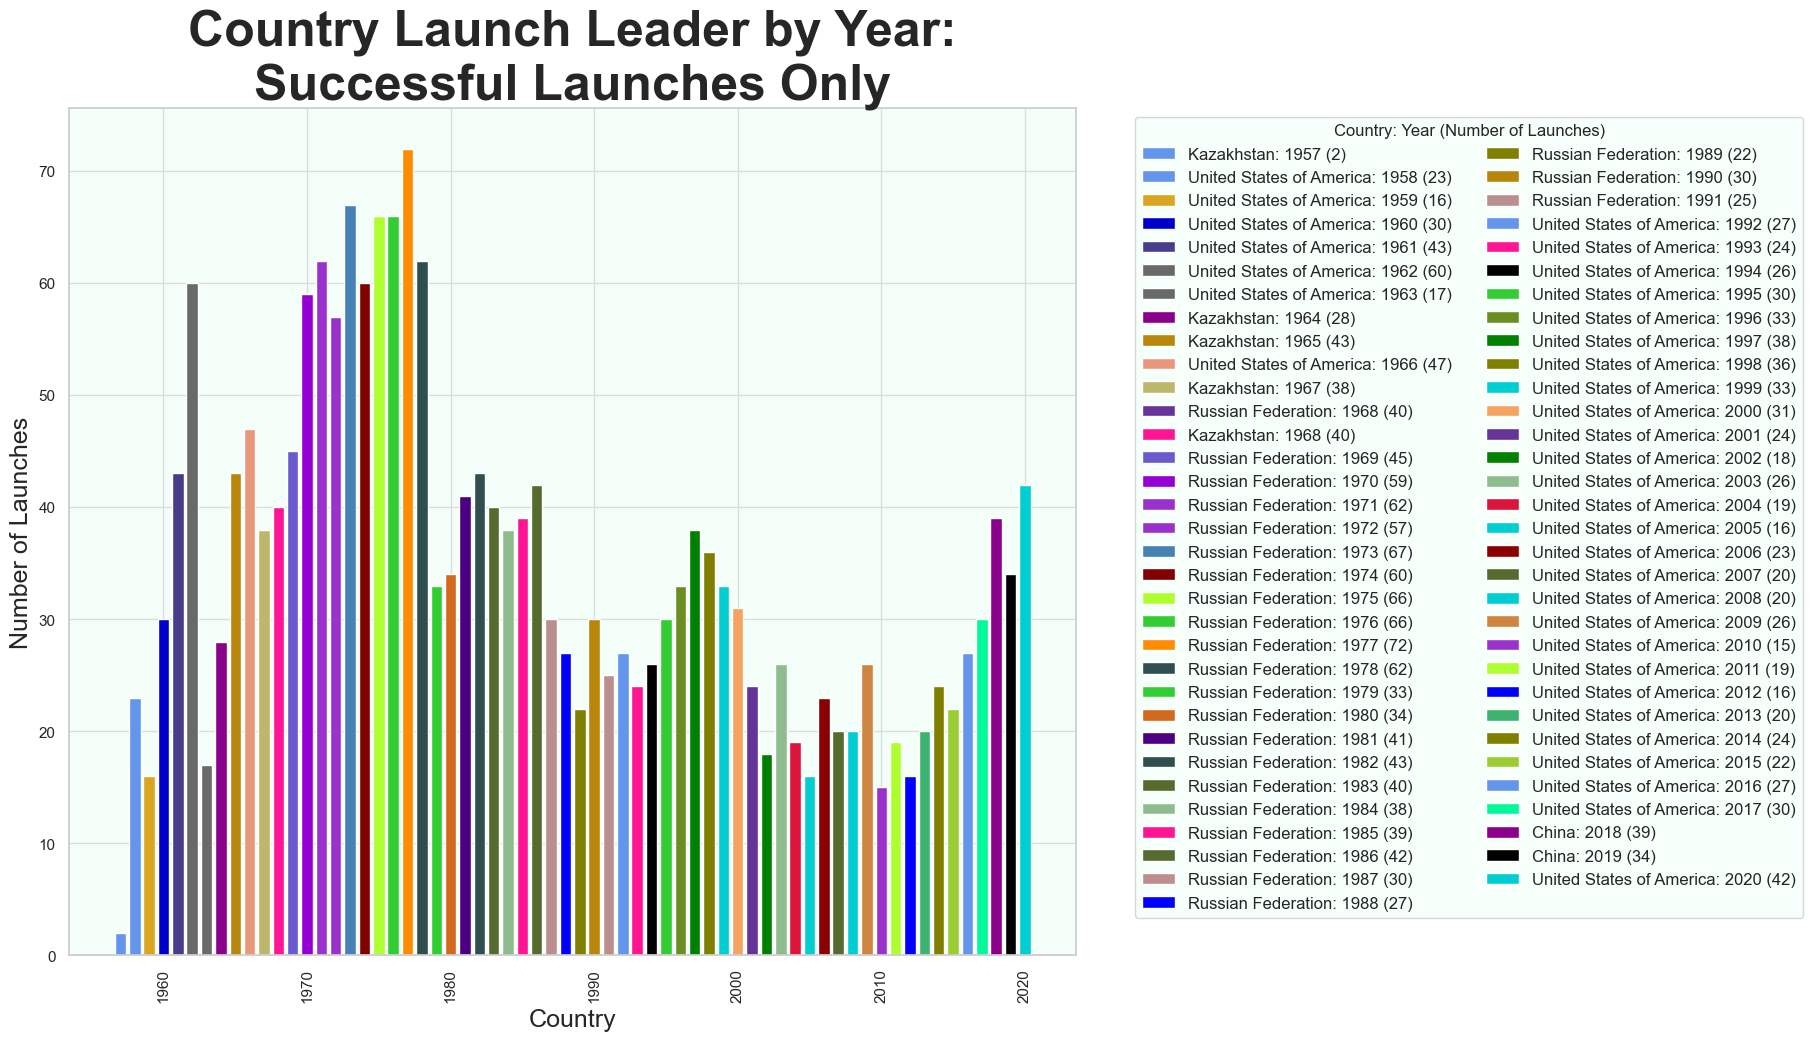

In [171]:
# Create DF filtering for Mission_Status == Success:
df_success = df_data[df_data['Mission_Status'] == 'Success']

# Group by country name then year, create those columns and another for launch count:
df_success_year = df_data.groupby(
    ['Country_Name', 'Year']).size().reset_index(name='Yearly_Launches')


df_success_year.sort_values(by=['Year'], inplace=True)

df_success_year = df_success_year[df_success_year['Year'] <= 2020]

# Get indices for max entry per year and create DF for max counts:
ind_eq1 = df_success_year.groupby('Year')['Yearly_Launches'].transform('max')
ind_eq2 = df_success_year['Yearly_Launches']
indices = ind_eq1 == ind_eq2
df_success_year_max = df_success_year[indices]
df_success_year_max.reset_index(inplace=True, drop=True)
df_success_year_max

# Clear colors to display on white background
color_list = ['black', 'blue', 'brown', 'chocolate', 'cornflowerblue', 'crimson',
              'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgreen', 'darkkhaki',
              'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred',
              'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray',
              'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'dimgray',
              'dodgerblue', 'firebrick', 'forestgreen', 'goldenrod', 'green', 'greenyellow', 'indigo', 'lightgreen', 'limegreen', 'maroon', 'mediumblue',
              'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'midnightblue',
              'navy', 'olive', 'olivedrab', 'palegreen', 'peru', 'purple', 'rebeccapurple', 'rosybrown', 'royalblue', 'saddlebrown', 'sandybrown',
              'seagreen', 'sienna', 'slateblue', 'springgreen', 'steelblue', 'yellowgreen']

# Pick the amount of colors for the length of the DF:
bar_colors = choices(color_list, k=len(df_success_year_max.Year))

# Create descriptive labels for legend:
zip_year_country = zip(df_success_year_max.Year,
                       df_success_year_max.Country_Name,
                       df_success_year_max.Yearly_Launches)

labels_year_country = [f"{year}: {country} ({num})" for country, year, num in zip_year_country]

# Now plot and see if there's a difference when we plot based only on Successes:
fig, ax = plt.subplots(figsize=(13, 11))

ax.bar(x=df_success_year_max.Year,
       height=df_success_year_max.Yearly_Launches,
       label=labels_year_country,
       color=bar_colors)

ax.set_title("Country Launch Leader by Year:\nSuccessful Launches Only", fontsize=36, weight='bold')
ax.set_xlabel("Country", fontsize=18)
ax.set_ylabel("Number of Launches", fontsize=18)

plt.legend(ncol=2,
           title="Country: Year (Number of Launches)",
           fontsize='medium',
           bbox_to_anchor=(1.05, 1))

plt.xticks(rotation=90)

plt.show()

It's hard to analyze quickly by looking at the plots, let's just print out the results for the all-inclusive DF and the successes DF in pairs:


In [172]:
differences = 0

for i in range(len(df_success_year_max.Country_Name)):
    year_all = df_country_year_max.Year[i]
    country_all = df_country_year_max.Country_Name[i]
    year_success = df_success_year_max.Year[i]
    country_success = df_success_year_max.Country_Name[i]

    # # Print all the info:
    # print(f"{year_all}: {country_all} (all launches leader)")
    # print(f"{year_success}: {country_success} (successful launches leader)")

    # # Print just the difference:
    if country_all != country_success:
        differences += 1
        print(f"{year_all}: {country_all} (all launches leader)")
        print(f"{year_success}: {country_success} (successful launches leader)")

print(f"There were {differences} year(s) with different results.")

There were 0 year(s) with different results.


Nope -- the data remains the same.

We can try the same thing below for Organisations, after the initial operation...


---
---


## **_Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches_**

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?


Just do what we did above for countries, but with organisations:


In [173]:
df_org_year = df_data.groupby(
    ['Organisation', 'Year']).size().reset_index(name='Yearly_Launches')

df_org_year.sort_values(by=['Year'], inplace=True)

df_org_year = df_org_year[df_org_year['Year'] <= 2020]

ind_eq1 = df_org_year.groupby('Year')['Yearly_Launches'].transform('max')
ind_eq2 = df_org_year['Yearly_Launches']
indices = ind_eq1 == ind_eq2

df_org_year_max = df_org_year[indices]

df_org_year_max.reset_index(inplace=True, drop=True)

Verify the result:


In [174]:
df_org_year_max

Organisation  Year  Yearly_Launches
0      RVSN USSR  1957                2
1        US Navy  1958               12
2   US Air Force  1959               10
3   US Air Force  1960               21
4   US Air Force  1961               23
..           ...   ...              ...
66          CASC  2016               22
67        SpaceX  2017               18
68          CASC  2018               37
69          CASC  2019               27
70          CASC  2020               34

[71 rows x 3 columns]

In [175]:
color_list = ['black', 'blue', 'brown', 'chocolate', 'cornflowerblue', 'crimson',
              'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgreen', 'darkkhaki',
              'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred',
              'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray',
              'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'dimgray',
              'dodgerblue', 'firebrick', 'forestgreen', 'goldenrod', 'green', 'greenyellow', 'indigo', 'lightgreen', 'limegreen', 'maroon', 'mediumblue',
              'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'midnightblue',
              'navy', 'olive', 'olivedrab', 'palegreen', 'peru', 'purple', 'rebeccapurple', 'rosybrown', 'royalblue', 'saddlebrown', 'sandybrown',
              'seagreen', 'sienna', 'slateblue', 'springgreen', 'steelblue', 'yellowgreen']

bar_colors = choices(color_list, k=len(df_org_year_max.Year))

Concatenate Country_Name and Year for the label:


In [176]:
zip_year_org = zip(df_org_year_max.Year,
                   df_org_year_max.Organisation,
                   df_org_year_max.Yearly_Launches)

labels_year_org = [f"{year}: {org} ({num})" for org, year, num in zip_year_org]

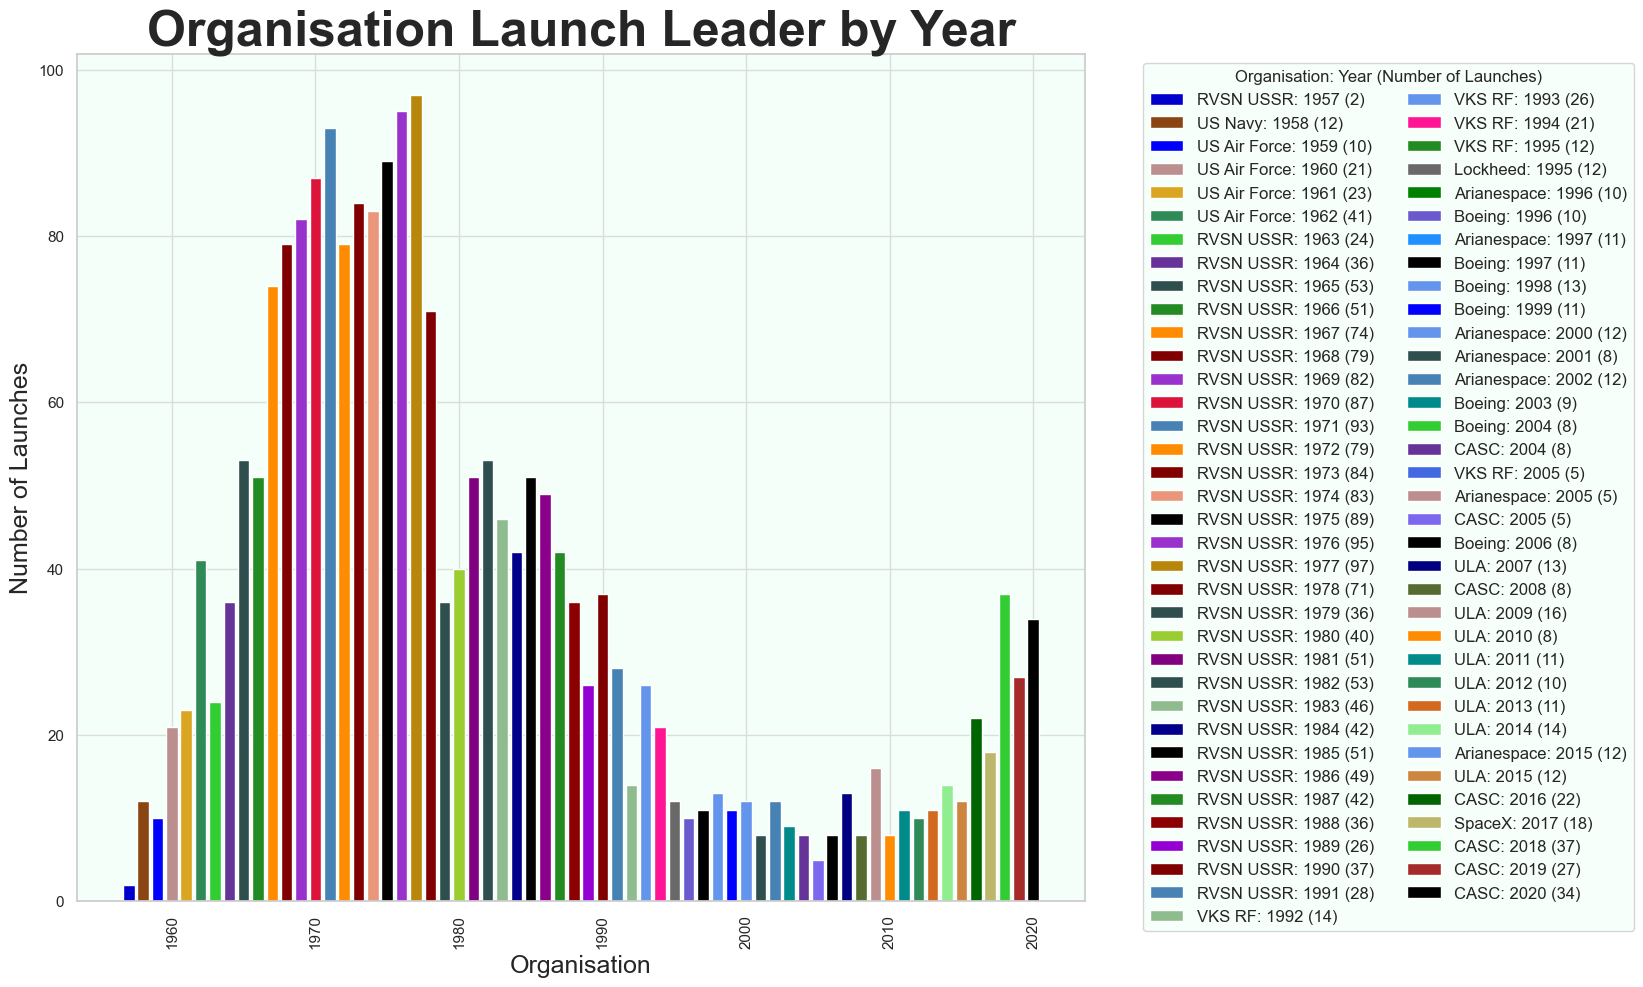

In [177]:
fig, ax = plt.subplots(figsize=(13, 11))

ax.bar(x=df_org_year_max.Year,
       height=df_org_year_max.Yearly_Launches,
       label=labels_year_org,
       color=bar_colors)

ax.set_title("Organisation Launch Leader by Year", fontsize=36, weight='bold')
ax.set_xlabel("Organisation", fontsize=18)
ax.set_ylabel("Number of Launches", fontsize=18)

plt.legend(ncol=2,
           title="Organisation: Year (Number of Launches)",
           fontsize='medium',
           bbox_to_anchor=(1.05, 1))

plt.xticks(rotation=90)

plt.show()

Answering Angela's questions:

Which organisation was dominant in the 1970s and 1980s?

-   RVSN USSR

Which organisation was dominant in 2018, 2019 and 2020?

-   CASC


Now to check if there is a difference if we analyze Organisation leaders based only on successes:


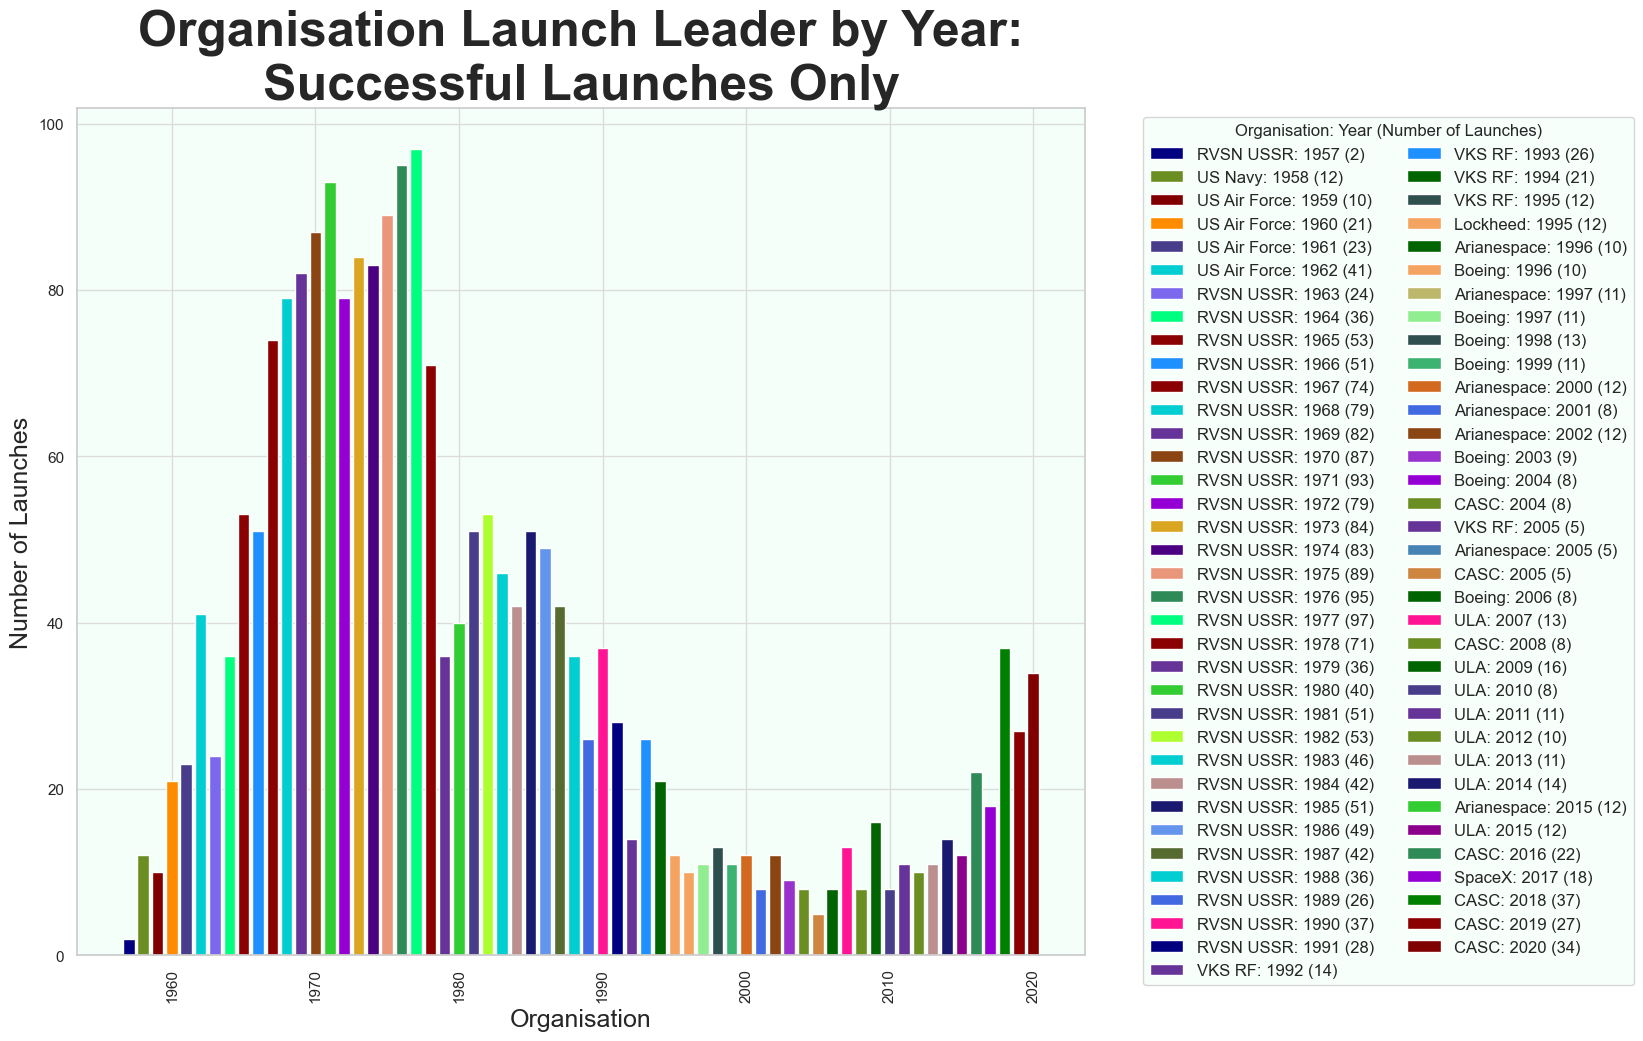

In [178]:
# Create DF filtering for Mission_Status == Success:
df_org_success = df_data[df_data['Mission_Status'] == 'Success']

# Group by org name then year, create those columns and another for launch count:
df_org_success_year = df_data.groupby(
    ['Organisation', 'Year']).size().reset_index(name='Yearly_Launches')


df_org_success_year.sort_values(by=['Year'], inplace=True)

df_org_success_year = df_org_success_year[df_org_success_year['Year'] <= 2020]

# Get indices for max entry per year and create DF for max counts:
ind_eq1 = df_org_success_year.groupby(
    'Year')['Yearly_Launches'].transform('max')
ind_eq2 = df_org_success_year['Yearly_Launches']
indices = ind_eq1 == ind_eq2
df_org_success_year_max = df_org_success_year[indices]
df_org_success_year_max.reset_index(inplace=True, drop=True)
df_org_success_year_max

# Clear colors to display on white background
color_list = ['black', 'blue', 'brown', 'chocolate', 'cornflowerblue', 'crimson',
              'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgreen', 'darkkhaki',
              'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred',
              'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray',
              'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'dimgray',
              'dodgerblue', 'firebrick', 'forestgreen', 'goldenrod', 'green', 'greenyellow', 'indigo', 'lightgreen', 'limegreen', 'maroon', 'mediumblue',
              'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'midnightblue',
              'navy', 'olive', 'olivedrab', 'palegreen', 'peru', 'purple', 'rebeccapurple', 'rosybrown', 'royalblue', 'saddlebrown', 'sandybrown',
              'seagreen', 'sienna', 'slateblue', 'springgreen', 'steelblue', 'yellowgreen']

# Pick the amount of colors for the length of the DF:
bar_colors = choices(color_list, k=len(df_org_success_year_max.Year))

# Create descriptive labels for legend:
zip_year_org = zip(df_org_success_year_max.Year,
                   df_org_success_year_max.Organisation,
                   df_org_success_year_max.Yearly_Launches)

labels_year_org = [f"{year}: {org} ({num})" for org, year, num in zip_year_org]

# Now plot and see if there's a difference when we plot based only on Successes:
fig, ax = plt.subplots(figsize=(13, 11))

ax.bar(x=df_org_success_year_max.Year,
       height=df_org_success_year_max.Yearly_Launches,
       label=labels_year_org,
       color=bar_colors)

ax.set_title("Organisation Launch Leader by Year:\nSuccessful Launches Only", fontsize=36, weight='bold')
ax.set_xlabel("Organisation", fontsize=18)
ax.set_ylabel("Number of Launches", fontsize=18)

plt.legend(ncol=2,
           title="Organisation: Year (Number of Launches)",
           fontsize='medium',
           bbox_to_anchor=(1.05, 1))

plt.xticks(rotation=90)

plt.show()

It's hard to analyze quickly by looking at the plots, let's just print out the results for the all-inclusive DF and the successes DF in pairs:


In [179]:
differences = 0

for i in range(len(df_org_year_max.Organisation)):
    year_all = df_org_year_max.Year[i]
    org_all = df_org_year_max.Organisation[i]
    year_success = df_org_success_year_max.Year[i]
    org_success = df_org_success_year_max.Organisation[i]

    # # Print all the info:
    # print(f"{year_all}: {org_all} (all launches leader)")
    # print(f"{year_success}: {org_success} (successful launches leader)")

    # # Print just the difference:
    if org_all != org_success:
        differences += 1
        print(f"{year_all}: {org_all} (all launches leader)")
        print(f"{year_success}: {org_success} (successful launches leader)")

print(f"There were {differences} year(s) with different results.")

There were 0 year(s) with different results.


The results are the same, regardless of whether we include all launches of only successful launches.


## **_Conclusion:_**

A very difficult project, but I got through it and completed the problems well, as far as I can see.

Lots of room for improvement on my part, but also I think I've come a long way and have a very solid grasp of concepts related to Pandas, Matplotlib, Plotly, Seaborn and other related libraries and subjects.

I used StackOverflow and other similar sites like GeeksforGeeks, as well as read, researched and studied the primary documentation.

ChatGPT was extremely helpful for helping me when I got stuck on more advanced Pandas challenges, and sometimes with plotting. I feel like I understand everything that I've written above.

Difficult day's assignment, took about a week.

Now on the the final day, almost there!

Note:

In the intro Angela uses `from datetime import datetime, timedelta`, I didn't end up using this...it's worth a closer look how I could have implemented these modules.
